In [1]:
import pandas as pd

In [2]:
df=pd.read_excel("May_2019.copy.XLSX")

In [3]:
df.describe()

,Sr.No,ATM_Onsite,ATM_Offsite,POS_Online,POS_Offline,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount
count,64.000000,65.000000,65.000000,6.500000e+01,65.0,6.500000e+01,65.000000,6.500000e+01,65.000000,65.000000,6.500000e+01,6.500000e+01,6.500000e+01,6.500000e+01,65.000000
mean,32.500000,3375.938462,2987.723077,1.183111e+05,0.0,1.505255e+06,27369.723077,5.327787e+06,128.406504,18856.142952,2.462883e+07,2.509878e+07,1.269326e+07,9.066669e+04,17860.554872
std,18.618987,13857.055704,12682.170428,4.930620e+05,0.0,6.364549e+06,114123.077624,2.255661e+07,537.536674,79919.341391,1.047787e+08,1.100821e+08,5.301879e+07,3.873019e+05,75108.511193
min,1.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,16.750000,77.000000,2.000000,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,5.398330e+05,5.136030e+05,2.206800e+05,2.082805e+03,324.346583
50%,32.500000,481.000000,282.000000,5.322000e+03,0.0,1.926000e+03,90.000000,3.792000e+03,0.345900,21.275091,2.838734e+06,2.354495e+06,1.564643e+06,9.097002e+03,1699.728683
75%,48.250000,2337.000000,805.000000,2.729500e+04,0.0,3.033970e+05,6157.000000,6.156000e+05,32.797700,1405.406032,1.210821e+07,9.068676e+06,5.467564e+06,3.815467e+04,7692.771373
max,64.000000,109718.000000,97101.000000,3.845111e+06,0.0,4.892080e+07,889516.000000,1.731531e+08,4173.211375,612824.645954,8.004371e+08,8.157102e+08,4.125309e+08,2.946668e+06,580468.033340


In [4]:
df.drop('Sr.No',axis=1,inplace=True)

In [5]:
df[(df['Bank Name']=='ALLAHABAD BANK')]

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,POS_Offline,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount
0,ALLAHABAD BANK,761,196,3116,0,0,0,0,0.0,0.0,5910582,9068676,3259136,22773.785279,3491.793271


In [6]:
df.drop([64],axis=0,inplace=True)

In [7]:
df.groupby('Bank Name').CC_Outstanding.sum().nlargest(5)

Bank Name
HDFC BANK LTD          12679846
STATE BANK OF INDIA     8734604
ICICI BANK LTD          7013846
AXIS BANK LTD           6170677
CITI BANK               2714145
Name: CC_Outstanding, dtype: int64

In [8]:
df.drop('POS_Offline',axis=1,inplace=True)

In [9]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

Bank Name
['ALLAHABAD BANK' 'ANDHRA BANK' 'BANK OF BARODA' 'BANK OF INDIA'
 'BANK OF MAHARASHTRA' 'CANARA BANK' 'CENTRAL BANK OF INDIA'
 'CORPORATION BANK' 'INDIAN BANK' 'INDIAN OVERSEAS BANK'
 'ORIENTAL BANK OF COMMERCE' 'PUNJAB AND SIND BANK' 'PUNJAB NATIONAL BANK'
 'SYNDICATE BANK' 'UCO BANK' 'UNION BANK OF INDIA' 'UNITED BANK OF INDIA'
 'IDBI LTD' 'STATE BANK OF INDIA' 'AXIS BANK LTD' 'BANDHAN BANK LTD'
 'CATHOLIC SYRIAN BANK LTD' 'CITY UNION BANK' 'DCB BANK LTD'
 'DHANALAKSHMI BANK LTD' 'FEDERAL BANK LTD' 'HDFC BANK LTD'
 'ICICI BANK LTD' 'IDFC Bank Limited' 'INDUSIND BANK LTD'
 'JAMMU AND KASHMIR BANK' 'KARNATAKA BANK LTD' 'KARUR VYSYA BANK LTD'
 'KOTAK MAHINDRA BANK LTD' 'RATNAKAR BANK LIMITED' 'SOUTH INDIAN BANK'
 'TAMILNAD MERCANTILE BANK LTD' 'THE LAXMI VILAS BANK LTD' 'YES BANK LTD'
 'AMERICAN EXPRESS' 'BANK OF AMERICA' 'BARCLAYS BANK PLC' 'CITI BANK'
 'DBS BANK' 'DEUTSCHE BANK LTD' 'HONGKONG AND SHANGHAI BKG CORPN'
 'STANDARD CHARTERED BANK LTD' 'ADITYA BIRLA IDEA PAYMENTS 

In [10]:
for column in df.columns:
    print(column,df[column].nunique())

Bank Name 64
ATM_Onsite 55
ATM_Offsite 49
POS_Online 43
CC_Outstanding 33
CC_ATM_Transaction 33
CC_POS_Transaction 33
CC_ATM_Amount 33
CC_POS_Amount 33
DC_Oustanding 61
DC_ATM_Transaction 59
DC_POS_Transaction 61
DC_ATM_amount 59
DC_POS_amount 61


In [11]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O'))]
categorical_features

['Bank Name']

In [12]:
numerical_features=[feature for feature in df.columns if ((df[feature].dtypes!='O'))]
numerical_features

['ATM_Onsite',
 'ATM_Offsite',
 'POS_Online',
 'CC_Outstanding',
 'CC_ATM_Transaction',
 'CC_POS_Transaction',
 'CC_ATM_Amount',
 'CC_POS_Amount',
 'DC_Oustanding',
 'DC_ATM_Transaction',
 'DC_POS_Transaction',
 'DC_ATM_amount',
 'DC_POS_amount']

In [13]:
discrete_features=[feature for feature in numerical_features if len(df[feature].unique())<25]

In [14]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_features]
continuous_features

['ATM_Onsite',
 'ATM_Offsite',
 'POS_Online',
 'CC_Outstanding',
 'CC_ATM_Transaction',
 'CC_POS_Transaction',
 'CC_ATM_Amount',
 'CC_POS_Amount',
 'DC_Oustanding',
 'DC_ATM_Transaction',
 'DC_POS_Transaction',
 'DC_ATM_amount',
 'DC_POS_amount']

C:\Users\sanyalam\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sanyalam\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sanyalam\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

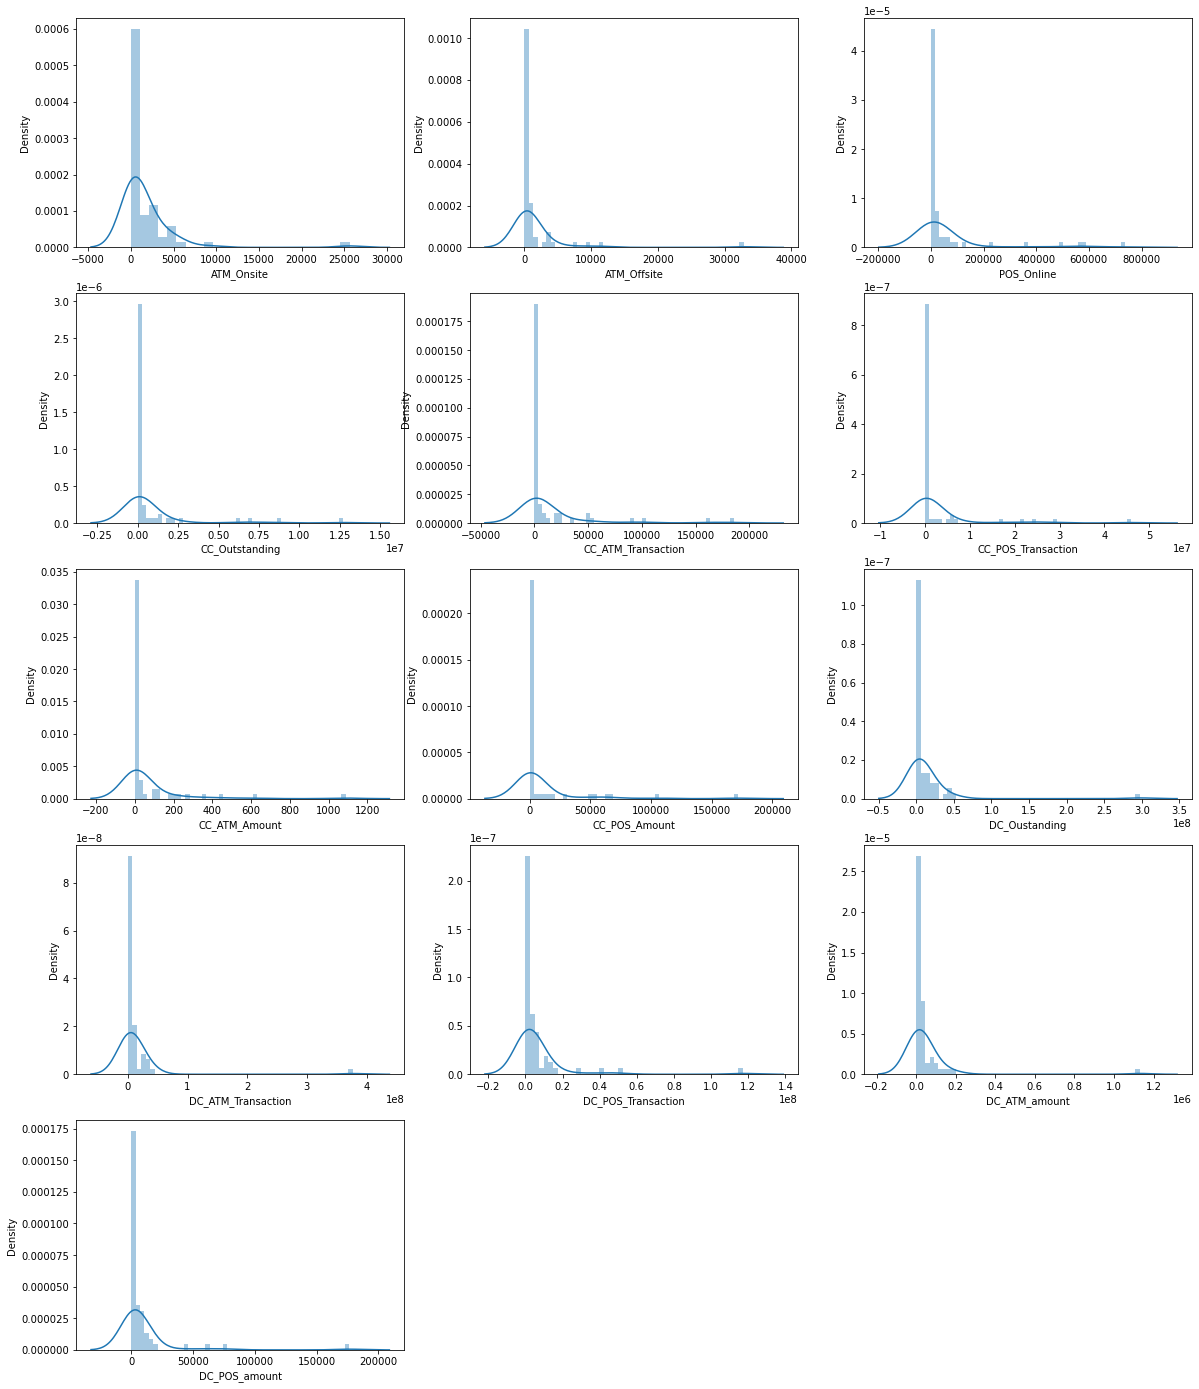

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for continuous_feature in continuous_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

C:\Users\sanyalam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sanyalam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sanyalam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sanyalam\Anac

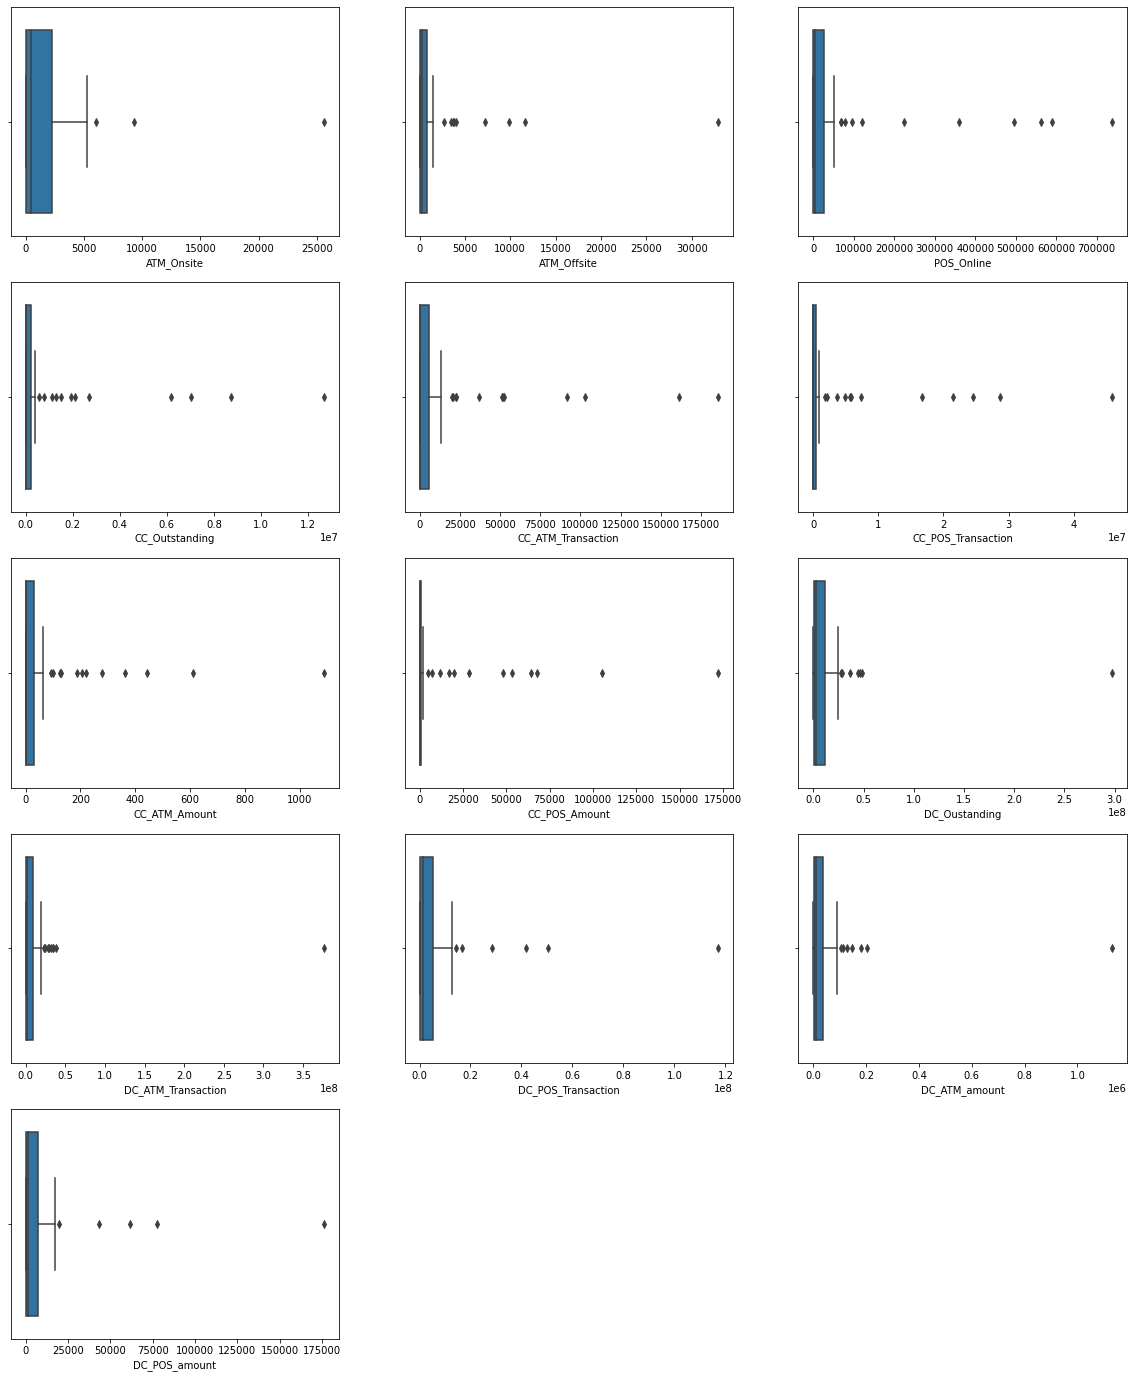

In [16]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for numerical_feature in numerical_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

<AxesSubplot:>

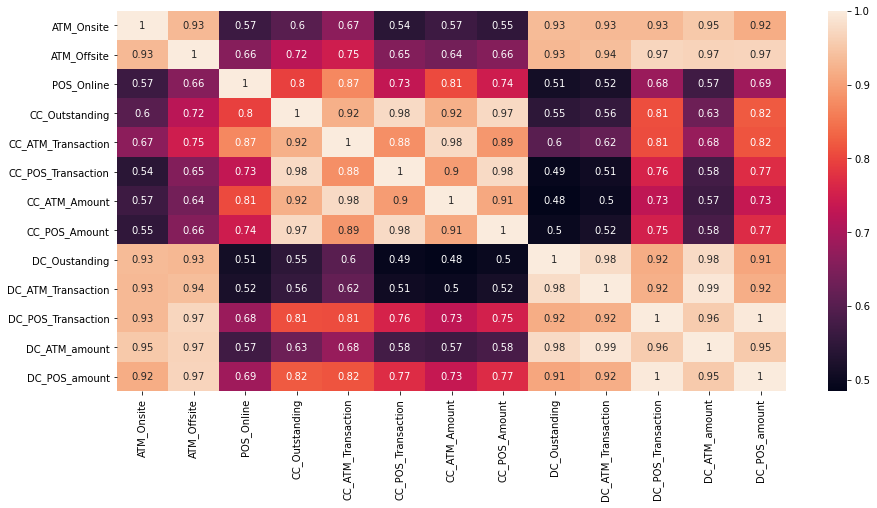

In [17]:
cor_mat=df.corr()
fig=plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

In [18]:
a1=df.groupby('Bank Name')
a1

In [19]:
#for data,data_df in a1:
  #  print(data)
   # print(data_df)

In [20]:
a1.get_group('BANDHAN BANK LTD')

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount
20,BANDHAN BANK LTD,481,0,27295,0,0,0,0.0,0.0,2915615,2140338,939112,8028.25893,1438.544989


In [21]:
a1['POS_Online'].max()

Bank Name
ADITYA BIRLA IDEA PAYMENTS BANK            0
AIRTEL PAYMENTS BANK                       0
ALLAHABAD BANK                          3116
AMERICAN EXPRESS                       44607
ANDHRA BANK                            13777
                                       ...  
UJJIVAN SMALL FINANCE BANK LIMITED         0
UNION BANK OF INDIA                    51096
UNITED BANK OF INDIA                    5553
UTKARSH SMALL FINANCE BANK LIMITED         0
YES BANK LTD                          120641
Name: POS_Online, Length: 64, dtype: int64

In [22]:
from itertools import groupby
groupby(df)

In [23]:
for key,group in (groupby(df)):
    print('key: ', key, ' group: ',list(group))

key:  Bank Name  group:  ['Bank Name']
key:  ATM_Onsite  group:  ['ATM_Onsite']
key:  ATM_Offsite  group:  ['ATM_Offsite']
key:  POS_Online  group:  ['POS_Online']
key:  CC_Outstanding  group:  ['CC_Outstanding']
key:  CC_ATM_Transaction  group:  ['CC_ATM_Transaction']
key:  CC_POS_Transaction  group:  ['CC_POS_Transaction']
key:  CC_ATM_Amount  group:  ['CC_ATM_Amount']
key:  CC_POS_Amount  group:  ['CC_POS_Amount']
key:  DC_Oustanding  group:  ['DC_Oustanding']
key:  DC_ATM_Transaction  group:  ['DC_ATM_Transaction']
key:  DC_POS_Transaction  group:  ['DC_POS_Transaction']
key:  DC_ATM_amount  group:  ['DC_ATM_amount']
key:  DC_POS_amount  group:  ['DC_POS_amount']


In [24]:
new_df=df[['Bank Name','DC_ATM_amount']]
new_df

,Bank Name,DC_ATM_amount
0,ALLAHABAD BANK,22773.785279
1,ANDHRA BANK,38154.666442
2,BANK OF BARODA,125633.462026
3,BANK OF INDIA,70860.315525
4,BANK OF MAHARASHTRA,28463.649115
...,...,...
59,JANA SMALL FINANCE BANK LIMITED,392.053400
60,NORTH EAST SMALL FINANCE BANK LIMITED,33.961196
61,SURYODAY SMALL FINANCE BANK LIMITED,63.570200
62,UJJIVAN SMALL FINANCE BANK LIMITED,8379.599100


In [25]:
new_df.loc[new_df['DC_ATM_amount']>3000,"Bank Name"].head(5)

0         ALLAHABAD BANK
1            ANDHRA BANK
2         BANK OF BARODA
3          BANK OF INDIA
4    BANK OF MAHARASHTRA
Name: Bank Name, dtype: object

In [26]:
n_df=df.copy()

In [27]:
n_df['DC_ATM_amount']=n_df['DC_ATM_amount']*1000000

In [28]:
for ind,row in n_df.iterrows():
    n_df.loc[ind,"DC_ATM_PTransac"]=row["DC_ATM_amount"]/row["DC_ATM_Transaction"] if row["DC_ATM_Transaction"]!=0 else 0

In [29]:
n_df["DC_ATM_PTransac"]

0     2511.258014
1     3529.053595
2     3921.682571
3     3671.964331
4     3704.248488
         ...     
59    3445.139237
60    3496.828254
61    1893.322611
62    4079.821833
63    3623.023447
Name: DC_ATM_PTransac, Length: 64, dtype: float64

In [30]:
bank_type=[]
for row in df['Bank Name']:
    if row=='ALLAHABAD BANK' or row=='ANDHRA BANK' or row=='BANK OF BARODA' or row== 'BANK OF INDIA' or row=='BANK OF MAHARASHTRA'or row=='CANARA BANK' or row=='CENTRAL BANK OF INDIA' or row== 'CORPORATION BANK' or row== 'INDIAN BANK' or row== 'INDIAN OVERSEAS BANK' or row== 'ORIENTAL BANK OF COMMERCE' or row=='PUNJAB AND SIND BANK' or row== 'PUNJAB NATIONAL BANK' or row=='SYNDICATE BANK' or row=='UCO BANK' or row=='UNION BANK OF INDIA' or row=='UNITED BANK OF INDIA' or row== 'STATE BANK OF INDIA' or row=='CITY UNION BANK' or row== 'JAMMU AND KASHMIR BANK' or row=='KARNATAKA BANK LTD':
        bank_type.append('Government Bank')
    else:
        bank_type.append('Private Bank')

In [31]:
n_df['bank_type']=bank_type

In [32]:
n_df

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount,DC_ATM_PTransac,bank_type
0,ALLAHABAD BANK,761,196,3116,0,0,0,0.000000,0.000000,5910582,9068676,3259136,2.277379e+10,3491.793271,2511.258014,Government Bank
1,ANDHRA BANK,3023,773,13777,303397,13624,615600,62.738465,1495.788702,28852129,10811586,6953162,3.815467e+10,9341.300000,3529.053595,Government Bank
2,BANK OF BARODA,9321,3850,78791,324275,21107,838895,92.758064,1883.972070,48888337,32035602,16675739,1.256335e+11,14651.528985,3921.682571,Government Bank
3,BANK OF INDIA,2645,3509,67740,185605,22457,344241,127.086755,849.792205,36822577,19297659,10305371,7.086032e+10,11220.117556,3671.964331,Government Bank
4,BANK OF MAHARASHTRA,1306,554,2350,0,0,0,0.000000,0.000000,5649325,7684055,4955403,2.846365e+10,5602.625140,3704.248488,Government Bank
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,JANA SMALL FINANCE BANK LIMITED,120,3,0,0,0,0,0.000000,0.000000,227703,113799,59353,3.920534e+08,74.692451,3445.139237,Private Bank
60,NORTH EAST SMALL FINANCE BANK LIMITED,0,0,0,0,0,0,0.000000,0.000000,58716,9712,2616,3.396120e+07,12.725397,3496.828254,Private Bank
61,SURYODAY SMALL FINANCE BANK LIMITED,25,1,0,0,0,0,0.000000,0.000000,18118,33576,9926,6.357020e+07,14.004844,1893.322611,Private Bank
62,UJJIVAN SMALL FINANCE BANK LIMITED,384,3,0,0,0,0,0.000000,0.000000,3108364,2053913,305994,8.379599e+09,262.127717,4079.821833,Private Bank


In [33]:
criteria=n_df['bank_type']=='Government Bank'

In [34]:
n_df[criteria].describe()

,ATM_Onsite,ATM_Offsite,POS_Online,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount,DC_ATM_PTransac
count,21.000000,21.000000,21.000000,2.100000e+01,21.000000,2.100000e+01,21.000000,21.000000,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,21.000000,21.000000
mean,3842.714286,2811.285714,58102.714286,5.182792e+05,14360.666667,1.578794e+06,61.732334,5526.814947,2.789434e+07,3.063362e+07,1.138209e+07,1.005416e+11,15492.173156,3831.792883
std,5374.898959,7021.022954,131473.229606,1.886963e+06,35785.385492,6.207360e+06,141.862678,22885.792996,6.285656e+07,7.982095e+07,2.461117e+07,2.383677e+11,37158.764469,683.019748
min,736.000000,48.000000,1066.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,1.837697e+06,1.512752e+06,4.633000e+05,6.349452e+09,782.746339,2035.450377
25%,1153.000000,406.000000,5553.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,5.910582e+06,6.720203e+06,3.259136e+06,2.536090e+10,3786.994921,3631.566810
50%,2645.000000,696.000000,12357.000000,5.836400e+04,2422.000000,1.631570e+05,11.303391,364.376546,1.126281e+07,9.819392e+06,5.032656e+06,3.815467e+10,6602.399985,3976.489769
75%,3933.000000,2720.000000,51096.000000,1.856050e+05,8618.000000,3.442410e+05,28.382256,1007.772916,2.082548e+07,2.375927e+07,1.002285e+07,7.086032e+10,11220.117556,4247.259035
max,25606.000000,32883.000000,589127.000000,8.734604e+06,160944.000000,2.864406e+07,610.928567,105373.145349,2.971657e+08,3.764035e+08,1.170264e+08,1.130261e+12,176121.198837,4628.648067


In [35]:
new_df=n_df[criteria]

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
z1=new_df['DC_ATM_PTransac'].median()
z1

3976.489769387041

In [38]:
new_df.head(1)

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount,DC_ATM_PTransac,bank_type
0,ALLAHABAD BANK,761,196,3116,0,0,0,0.0,0.0,5910582,9068676,3259136,2.277379e+10,3491.793271,2511.258014,Government Bank


Text(0, 0.5, 'Line plot')

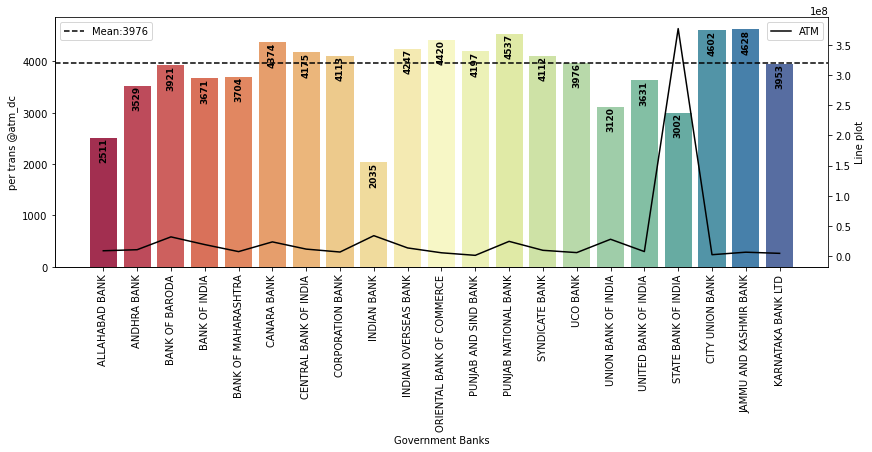

In [39]:
plot=sns.catplot(x="Bank Name",y="DC_ATM_PTransac",data=new_df,kind='bar',height=4,aspect=3,palette='Spectral')#uepalette='cubehelix'
plt.axhline(z1,color='k',linestyle="--",label='Mean:3976')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel("Government Banks")
plt.ylabel("per trans @atm_dc")

for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i, # bar index (x coordinate of text)
        h+10, # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center', 
        va='top', 
        color='black',
        fontweight='bold',
        rotation=90,
        size=9)

x = new_df["Bank Name"]
y = new_df["DC_ATM_Transaction"]
axes2 = plt.twinx()
axes2.plot(x, y, color='k',label='ATM')
plt.legend()
axes2.set_ylabel('Line plot')


In [40]:
s=n_df.bank_type
counts=s.value_counts()
percent100=s.value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
percent100

Private Bank       67.2%
Government Bank    32.8%
Name: bank_type, dtype: object

In [41]:
z1=new_df['DC_ATM_PTransac'].median()
z1

3976.489769387041

In [42]:
n_df['DC_POS_amount']=n_df['DC_POS_amount']*1000000

In [43]:
for ind,row in n_df.iterrows():
    n_df.loc[ind,"DC_POS_PTransac"]=row["DC_POS_amount"]/row["DC_POS_Transaction"] if row["DC_POS_Transaction"]!=0 else 0

In [44]:
criteria=n_df['bank_type']=='Government Bank'
new_df=n_df[criteria]

In [45]:
z2=new_df['DC_POS_PTransac'].mean()
z2

1359.9976477116943

Text(0, 0.5, 'Line plot')

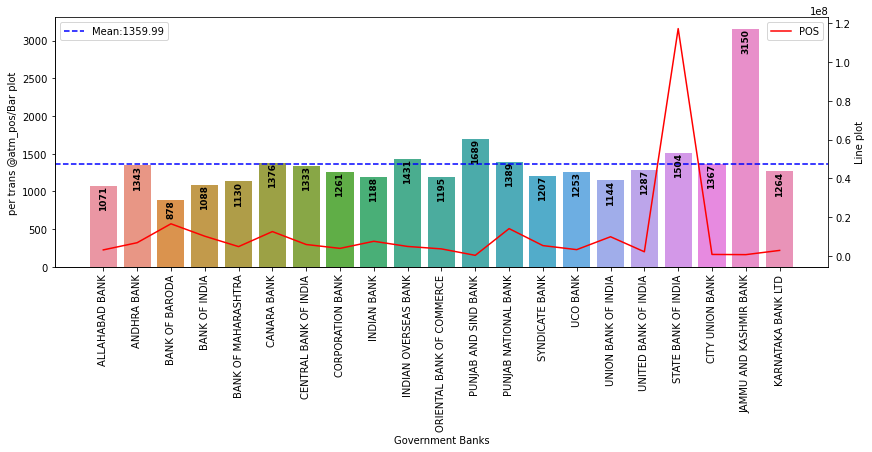

In [46]:
import numpy as np
plot=sns.catplot(x="Bank Name",y="DC_POS_PTransac",data=new_df,kind='bar',height=4,aspect=3)#palette='cubehelix'
plt.axhline(z2,color='b',linestyle="--",label='Mean:1359.99')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel("Government Banks")
plt.ylabel("per trans @atm_pos/Bar plot")

for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i, # bar index (x coordinate of text)
        h+10, # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center', 
        va='top', 
        color='black',
        fontweight='bold',
        rotation=90,
        size=9)

x = new_df["Bank Name"]
y = new_df["DC_POS_Transaction"]
axes2 = plt.twinx()
axes2.plot(x, y, color='r',label='POS')
plt.legend()
axes2.set_ylabel('Line plot')


In [47]:
check1_df=new_df[['Bank Name','DC_POS_Transaction']]

In [48]:
n_df['CC_POS_Amount']=n_df['CC_POS_Amount']*1000000

In [49]:
for ind,row in n_df.iterrows():
    n_df.loc[ind,"CC_POS_PTransac_CC"]=row["CC_POS_Amount"]/row["CC_POS_Transaction"] if row["CC_POS_Transaction"]!=0 else 0

In [50]:
n_df['CC_ATM_Amount']=n_df['CC_ATM_Amount']*1000000

In [51]:
for ind,row in n_df.iterrows():
    n_df.loc[ind,"CC_ATM_PTransac"]=row["CC_ATM_Amount"]/row["CC_ATM_Transaction"] if row["CC_ATM_Transaction"]!=0 else 0

In [52]:
n_df[(n_df['bank_type']=='Government Bank') & (n_df['CC_ATM_PTransac']>0)].sort_values(by='CC_ATM_Transaction',ascending=False).head(2)

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount,DC_ATM_PTransac,bank_type,DC_POS_PTransac,CC_POS_PTransac_CC,CC_ATM_PTransac
18,STATE BANK OF INDIA,25606,32883,589127,8734604,160944,28644056,610928567.0,1.053731e+11,297165746,376403513,117026441,1.130261e+12,1.761212e+11,3002.791866,Government Bank,1504.969282,3678.708956,3795.907688
5,CANARA BANK,4760,4077,21910,381745,52412,786726,280075180.0,1.628261e+09,18437346,23759272,12679492,1.039302e+11,1.745155e+10,4374.301269,Government Bank,1376.360172,2069.667497,5343.722430


In [53]:
ww=n_df.groupby('Bank Name').DC_POS_PTransac.sum()

In [54]:
ww1=n_df.groupby('Bank Name').CC_POS_PTransac_CC.sum()

In [55]:
a1_df=pd.concat([ww,ww1],axis='columns')

In [56]:
a1_df.head(1)

,DC_POS_PTransac,CC_POS_PTransac_CC
Bank Name,,
ADITYA BIRLA IDEA PAYMENTS BANK,706.074906,0.0


In [57]:
arranged_cc=a1_df[(a1_df['CC_POS_PTransac_CC']>0)]

In [58]:
#arranged_cc.describe()

In [59]:
arranged_dc=a1_df[(a1_df['DC_POS_PTransac']>0)]

In [60]:
combined_pos=a1_df[(a1_df['DC_POS_PTransac']>0) & (a1_df['CC_POS_PTransac_CC']>0)]

In [61]:
bank_df=pd.concat([n_df['Bank Name'],n_df['bank_type']],axis='columns')

In [62]:
merged_inner=pd.merge(left=a1_df,right=bank_df,left_on=a1_df.index,right_on='Bank Name')

In [63]:
merged_final=merged_inner.set_index('Bank Name')

In [64]:
merged_inner1=merged_inner[(merged_inner['DC_POS_PTransac']>0) & (merged_inner['CC_POS_PTransac_CC']>0) & (merged_inner['bank_type']=='Government Bank')]

In [65]:
merged_inner11=merged_inner1.set_index('Bank Name')
merged_inner11.head(2)

,DC_POS_PTransac,CC_POS_PTransac_CC,bank_type
Bank Name,,,
ANDHRA BANK,1343.460716,2429.806209,Government Bank
BANK OF BARODA,878.613475,2245.778160,Government Bank


In [66]:
government_dc_pos=merged_inner[(merged_inner['DC_POS_PTransac']>0) & (merged_inner['bank_type']=='Government Bank')]
government_dc_pos=government_dc_pos.set_index('Bank Name')

In [67]:
government_cc_pos=merged_inner[(merged_inner['CC_POS_PTransac_CC']>0) & (merged_inner['bank_type']=='Government Bank')]
government_cc_pos=government_cc_pos.set_index('Bank Name')

In [68]:
private_combined_df=merged_final[(merged_final['DC_POS_PTransac']>0) & (merged_final['CC_POS_PTransac_CC']>0) & (merged_final['bank_type']=='Private Bank')]

In [69]:
private_dc_pos=merged_final[(merged_final['DC_POS_PTransac']>0) & (merged_final['bank_type']=='Private Bank')]

In [70]:
private_cc_pos=merged_final[(merged_final['CC_POS_PTransac_CC']>0) & (merged_final['bank_type']=='Private Bank')]

In [71]:
#2018

In [72]:
df_2018=pd.read_excel("May_2018 - Copy.XLS")

In [73]:
df_2018.drop('Sr.No',axis=1,inplace=True)

In [74]:
df_2018.head(1)

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,POS_Offline,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount
0,ALLAHABAD BANK,850,265,3063,0,0,0,0,0.0,0.0,13042946,8196370,4687837,20161.644307,3023.795909


In [75]:
df_2018.drop([66],axis=0,inplace=True)

In [76]:
#df_2018.describe()

In [77]:
bank_type=[]
for row in df_2018['Bank Name']:
    if row=='ALLAHABAD BANK' or row=='ANDHRA BANK' or row=='BANK OF BARODA' or row== 'BANK OF INDIA' or row=='BANK OF MAHARASHTRA'or row=='CANARA BANK' or row=='CENTRAL BANK OF INDIA' or row== 'CORPORATION BANK' or row== 'INDIAN BANK' or row== 'INDIAN OVERSEAS BANK' or row== 'ORIENTAL BANK OF COMMERCE' or row=='PUNJAB AND SIND BANK' or row== 'PUNJAB NATIONAL BANK' or row=='SYNDICATE BANK' or row=='UCO BANK' or row=='UNION BANK OF INDIA' or row=='UNITED BANK OF INDIA' or row== 'STATE BANK OF INDIA' or row=='CITY UNION BANK' or row== 'JAMMU AND KASHMIR BANK' or row=='KARNATAKA BANK LTD' or row=='DENA BANK' or row=='VIJAYA BANK':
        bank_type.append('Government Bank')
    else:
        bank_type.append('Private Bank')

In [78]:
df_2018_copy=df_2018.copy()

In [79]:
df_2018_copy['bank_type']=bank_type

In [80]:
df_2018_copy.head(2)

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,POS_Offline,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount,bank_type
0,ALLAHABAD BANK,850,265,3063,0,0,0,0,0.000000,0.000000,13042946,8196370,4687837,20161.644307,3023.795909,Government Bank
1,ANDHRA BANK,3182,808,14311,0,240799,14162,503715,67.200869,1224.019664,24741870,8689780,6050753,29446.050534,8014.800000,Government Bank


In [81]:
df_2018_copy['DC_ATM_amount']=df_2018_copy['DC_ATM_amount']*1000000

In [82]:
for ind,row in df_2018_copy.iterrows():
    df_2018_copy.loc[ind,"DC_ATM_PTransac_1"]=row["DC_ATM_amount"]/row["DC_ATM_Transaction"] if row["DC_ATM_Transaction"]!=0 else 0

In [83]:
criteria_1=df_2018_copy['bank_type']=='Government Bank'

In [84]:
df_govt_2018=df_2018_copy[criteria_1]

In [85]:
df_govt_atm_2018=df_govt_2018[['Bank Name','DC_ATM_PTransac_1']]

In [86]:
df_govt_atm_2019=new_df[['Bank Name','DC_ATM_PTransac']]

In [87]:
df_govt_atm_combined=pd.merge(left=df_govt_atm_2018,right=df_govt_atm_2019,left_on='Bank Name',right_on='Bank Name')

In [88]:
df_govt_atm_combined.head(2)

,Bank Name,DC_ATM_PTransac_1,DC_ATM_PTransac
0,ALLAHABAD BANK,2459.826034,2511.258014
1,ANDHRA BANK,3388.584122,3529.053595


In [89]:
df_govt_atm_combined['YoY growth']=(df_govt_atm_combined['DC_ATM_PTransac']-df_govt_atm_combined['DC_ATM_PTransac_1'])/df_govt_atm_combined['DC_ATM_PTransac_1']*100

In [90]:
df_govt_atm_combined.sort_values(by='YoY growth',ascending=False).head(2)

,Bank Name,DC_ATM_PTransac_1,DC_ATM_PTransac,YoY growth
3,BANK OF INDIA,2267.566846,3671.964331,61.934116
1,ANDHRA BANK,3388.584122,3529.053595,4.145374


In [91]:
df_2018_copy.head(1)

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,POS_Offline,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount,bank_type,DC_ATM_PTransac_1
0,ALLAHABAD BANK,850,265,3063,0,0,0,0,0.0,0.0,13042946,8196370,4687837,2.016164e+10,3023.795909,Government Bank,2459.826034


In [92]:
df_2018_copy['CC_ATM_Amount']=df_2018_copy['CC_ATM_Amount']*1000000

In [93]:
for ind,row in df_2018_copy.iterrows():
    df_2018_copy.loc[ind,"CC_ATM_PTransac_1"]=row["CC_ATM_Amount"]/row["CC_ATM_Transaction"] if row["CC_ATM_Transaction"]!=0 else 0

In [94]:
df_govt_2018_cc=df_2018_copy[criteria_1]

In [95]:
df_govt_cc_atm_2018=df_govt_2018_cc[['Bank Name','CC_ATM_PTransac_1']]

In [96]:
df_govt_cc_atm_2019=n_df[['Bank Name','CC_ATM_PTransac']]

In [97]:
df_govt_atm_cc_combined=pd.merge(left=df_govt_cc_atm_2018,right=df_govt_cc_atm_2019,left_on='Bank Name',right_on='Bank Name')

In [98]:
df_govt_atm_cc_combined.head(1)

,Bank Name,CC_ATM_PTransac_1,CC_ATM_PTransac
0,ALLAHABAD BANK,0.0,0.0


In [99]:
df_govt_atm_cc_combined['YoY growth']=(df_govt_atm_cc_combined['CC_ATM_PTransac']-df_govt_atm_cc_combined['CC_ATM_PTransac_1'])/df_govt_atm_cc_combined['CC_ATM_PTransac_1']*100

In [100]:
a2_df=df_govt_atm_cc_combined.drop([0,4,10,11,16,20,14],axis=0)

In [101]:
a2_df.sort_values(by='YoY growth',ascending=False).head(5)

,Bank Name,CC_ATM_PTransac_1,CC_ATM_PTransac,YoY growth
13,SYNDICATE BANK,3607.343928,4261.471321,18.133214
8,INDIAN BANK,5005.854801,5498.907502,9.849521
2,BANK OF BARODA,4143.439754,4394.658823,6.063056
5,CANARA BANK,5102.087737,5343.722430,4.735996
3,BANK OF INDIA,5409.250896,5659.115428,4.619208


In [102]:
df_2018_copy['DC_POS_amount']=df_2018_copy['DC_POS_amount']*1000000

In [103]:
df_2018_copy.head(2)

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,POS_Offline,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount,bank_type,DC_ATM_PTransac_1,CC_ATM_PTransac_1
0,ALLAHABAD BANK,850,265,3063,0,0,0,0,0.00,0.000000,13042946,8196370,4687837,2.016164e+10,3.023796e+09,Government Bank,2459.826034,0.00000
1,ANDHRA BANK,3182,808,14311,0,240799,14162,503715,67200868.96,1224.019664,24741870,8689780,6050753,2.944605e+10,8.014800e+09,Government Bank,3388.584122,4745.15386


In [104]:
for ind,row in df_2018_copy.iterrows():
    df_2018_copy.loc[ind,"DC_POS_PTransac_2018"]=row["DC_POS_amount"]/row["DC_POS_Transaction"] if row["DC_POS_Transaction"]!=0 else 0

In [105]:
df_2018_copy['CC_POS_Amount']=df_2018_copy['CC_POS_Amount']*1000000

In [106]:
for ind,row in df_2018_copy.iterrows():
    df_2018_copy.loc[ind,"CC_POS_PTransac_2018"]=row["CC_POS_Amount"]/row["CC_POS_Transaction"] if row["CC_POS_Transaction"]!=0 else 0

In [107]:
df_govt_2018_cc_1=df_2018_copy[criteria_1]

In [108]:
df_govt_cc_pos_2018=df_govt_2018_cc_1[['Bank Name','CC_POS_PTransac_2018']]

In [109]:
df_govt_cc_pos_2019=n_df[['Bank Name','CC_POS_PTransac_CC']]

In [110]:
df_govt_pos_cc_combined=pd.merge(left=df_govt_cc_pos_2018,right=df_govt_cc_pos_2019,left_on='Bank Name',right_on='Bank Name')
df_govt_pos_cc_combined.head(2)

,Bank Name,CC_POS_PTransac_2018,CC_POS_PTransac_CC
0,ALLAHABAD BANK,0.000000,0.000000
1,ANDHRA BANK,2429.984542,2429.806209


In [111]:
df_govt_pos_cc_combined['YoY growth']=(df_govt_pos_cc_combined['CC_POS_PTransac_CC']-df_govt_pos_cc_combined['CC_POS_PTransac_2018'])/df_govt_pos_cc_combined['CC_POS_PTransac_2018']*100

In [112]:
df_govt_pos_cc_combined.sort_values(by='YoY growth',ascending=False).head(2)

,Bank Name,CC_POS_PTransac_2018,CC_POS_PTransac_CC,YoY growth
8,INDIAN BANK,253.945220,2321.446476,814.152459
16,UNITED BANK OF INDIA,1832.456571,2455.290407,33.989009


In [113]:
df_govt_dc_pos_2018=df_govt_2018_cc_1[['Bank Name','DC_POS_PTransac_2018']]

In [114]:
df_govt_dc_pos_2019=n_df[['Bank Name','DC_POS_PTransac']]

In [115]:
df_govt_pos_dc_combined=pd.merge(left=df_govt_dc_pos_2018,right=df_govt_dc_pos_2019,left_on='Bank Name',right_on='Bank Name')
df_govt_pos_dc_combined.head(2)

,Bank Name,DC_POS_PTransac_2018,DC_POS_PTransac
0,ALLAHABAD BANK,645.030087,1071.386180
1,ANDHRA BANK,1324.595468,1343.460716


In [116]:
df_govt_pos_dc_combined['YoY growth']=(df_govt_pos_dc_combined['DC_POS_PTransac']-df_govt_pos_dc_combined['DC_POS_PTransac_2018'])/df_govt_pos_dc_combined['DC_POS_PTransac_2018']*100

In [117]:
df_govt_pos_dc_combined.sort_values(by='YoY growth',ascending=False).head(2)

,Bank Name,DC_POS_PTransac_2018,DC_POS_PTransac,YoY growth
0,ALLAHABAD BANK,645.030087,1071.386180,66.098637
3,BANK OF INDIA,856.377779,1088.764059,27.135954


In [118]:
criteria_11=n_df['bank_type']=='Private Bank'
new_private_df=n_df[criteria_11]

In [119]:
df_pvt_dc_2019=new_private_df[['Bank Name','DC_ATM_PTransac']]

In [120]:
df_pvt_dc_2019.head(1)

,Bank Name,DC_ATM_PTransac
17,IDBI LTD,4450.904286


In [121]:
criteria_12=df_2018_copy['bank_type']=='Private Bank'
new_private_df_2018=df_2018_copy[criteria_12]

In [122]:
new_private_df_2018.head(1)

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,POS_Offline,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount,bank_type,DC_ATM_PTransac_1,CC_ATM_PTransac_1,DC_POS_PTransac_2018,CC_POS_PTransac_2018
19,IDBI LTD,2185,1554,30102,0,28773,824,158789,3991842.95,3.581621e+08,11697817,8922033,7331453,3.939749e+10,7.418555e+09,Private Bank,4415.752348,4844.4696,1011.880551,2255.58538


In [123]:
df_pvt_dc_2018=new_private_df_2018[['Bank Name','DC_ATM_PTransac_1']]

In [124]:
df_pvt_atm_dc_combined=pd.merge(left=df_pvt_dc_2018,right=df_pvt_dc_2019,left_on='Bank Name',right_on='Bank Name')
df_pvt_atm_dc_combined.head(2)

,Bank Name,DC_ATM_PTransac_1,DC_ATM_PTransac
0,IDBI LTD,4415.752348,4450.904286
1,AXIS BANK LTD,4685.642921,5010.412200


In [125]:
df_pvt_atm_dc_combined['YoY growth']=((df_pvt_atm_dc_combined['DC_ATM_PTransac']-df_pvt_atm_dc_combined['DC_ATM_PTransac_1'])/df_pvt_atm_dc_combined['DC_ATM_PTransac_1']*100)
pd.options.display.float_format='{:.5f}'.format

In [126]:
df_pvt_atm_dc_combined.head(1)

,Bank Name,DC_ATM_PTransac_1,DC_ATM_PTransac,YoY growth
0,IDBI LTD,4415.75235,4450.90429,0.79606


In [127]:
df_pvt_cc_atm_2018=new_private_df_2018[['Bank Name','CC_ATM_PTransac_1']]

In [128]:
df_pvt_cc_atm_2018.head(5)

,Bank Name,CC_ATM_PTransac_1
19,IDBI LTD,4844.46960
21,AXIS BANK LTD,4146.87340
22,BANDHAN BANK LTD,0.00000
23,CATHOLIC SYRIAN BANK LTD,0.00000
25,DCB BANK LTD,4634.88790


In [129]:
df_pvt_cc_atm_2019=new_private_df[['Bank Name','CC_ATM_PTransac']]

In [130]:
df_pvt_atm_cc_combined=pd.merge(left=df_pvt_cc_atm_2018,right=df_pvt_cc_atm_2019,left_on='Bank Name',right_on='Bank Name')
df_pvt_atm_cc_combined.head(2)

,Bank Name,CC_ATM_PTransac_1,CC_ATM_PTransac
0,IDBI LTD,4844.46960,5255.90312
1,AXIS BANK LTD,4146.87340,4314.12390


In [131]:
df_pvt_atm_cc_combined['YoY growth']=((df_pvt_atm_cc_combined['CC_ATM_PTransac']-df_pvt_atm_cc_combined['CC_ATM_PTransac_1'])/df_pvt_atm_cc_combined['CC_ATM_PTransac_1']*100)
pd.options.display.float_format='{:.5f}'.format

In [132]:
df_pvt_atm_cc_combined.sort_values(by='YoY growth',ascending=False).head(5)

,Bank Name,CC_ATM_PTransac_1,CC_ATM_PTransac,YoY growth
11,KARUR VYSYA BANK LTD,0.00000,7259.14634,inf
4,DCB BANK LTD,4634.88790,5668.55068,22.30179
25,STANDARD CHARTERED BANK LTD,4983.23986,5948.42488,19.36862
15,TAMILNAD MERCANTILE BANK LTD,4096.91206,4557.07365,11.23191
7,HDFC BANK LTD,5289.83431,5866.91372,10.90922


In [133]:
df_pvt_cc_pos_2019=new_private_df[['Bank Name','CC_POS_PTransac_CC']]

In [134]:
df_pvt_cc_pos_2018=new_private_df_2018[['Bank Name','CC_POS_PTransac_2018']]

In [135]:
df_pvt_pos_cc_combined=pd.merge(left=df_pvt_cc_pos_2018,right=df_pvt_cc_pos_2019,left_on='Bank Name',right_on='Bank Name')
df_pvt_pos_cc_combined.head(2)

,Bank Name,CC_POS_PTransac_2018,CC_POS_PTransac_CC
0,IDBI LTD,2255.58538,2470.96967
1,AXIS BANK LTD,3709.81480,3864.84295


In [136]:
df_pvt_pos_cc_combined['YoY growth']=(df_pvt_pos_cc_combined['CC_POS_PTransac_CC']-df_pvt_pos_cc_combined['CC_POS_PTransac_2018'])/df_pvt_pos_cc_combined['CC_POS_PTransac_2018']*100

In [137]:
new_private_df_2018.head(1)

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,POS_Offline,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount,bank_type,DC_ATM_PTransac_1,CC_ATM_PTransac_1,DC_POS_PTransac_2018,CC_POS_PTransac_2018
19,IDBI LTD,2185,1554,30102,0,28773,824,158789,3991842.95000,358162146.94000,11697817,8922033,7331453,39397488167.00999,7418554703.67000,Private Bank,4415.75235,4844.46960,1011.88055,2255.58538


In [138]:
df_pvt_dc_pos_2019=new_private_df[['Bank Name','DC_POS_PTransac']]

In [139]:
df_pvt_dc_pos_2018=new_private_df_2018[['Bank Name','DC_POS_PTransac_2018']]

In [140]:
df_pvt_pos_dc_combined=pd.merge(left=df_pvt_dc_pos_2018,right=df_pvt_dc_pos_2019,left_on='Bank Name',right_on='Bank Name')
df_pvt_pos_dc_combined.head(2)

,Bank Name,DC_POS_PTransac_2018,DC_POS_PTransac
0,IDBI LTD,1011.88055,1372.94574
1,AXIS BANK LTD,1464.20500,1509.31770


In [141]:
df_pvt_pos_dc_combined['YoY growth']=((df_pvt_pos_dc_combined['DC_POS_PTransac']-df_pvt_pos_dc_combined['DC_POS_PTransac_2018'])/df_pvt_pos_dc_combined['DC_POS_PTransac_2018'])*100

In [142]:
#format_dict={'YoY growth':'{:.2%}'}

In [143]:
new_private_df.head(5)

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount,DC_ATM_PTransac,bank_type,DC_POS_PTransac,CC_POS_PTransac_CC,CC_ATM_PTransac
17,IDBI LTD,2205,1497,34974,33317,953,137806,5008875.67000,340514446.60000,12108214,9701166,6327793,43178961328.47000,8687716444.37000,4450.90429,Private Bank,1372.94574,2470.96967,5255.90312
19,AXIS BANK LTD,5257,11631,496598,6170677,102603,16677302,442642055.00000,64455153075.00000,24185091,29505062,28524901,147832522598.69000,43053137845.00000,5010.41220,Private Bank,1509.31770,3864.84295,4314.12390
20,BANDHAN BANK LTD,481,0,27295,0,0,0,0.00000,0.00000,2915615,2140338,939112,8028258930.00000,1438544988.57000,3750.93043,Private Bank,1531.81408,0.00000,0.00000
21,CATHOLIC SYRIAN BANK LTD,237,47,0,0,0,0,0.00000,0.00000,601779,513603,220680,2082804800.00000,324346583.09000,4055.28161,Private Bank,1469.75976,0.00000,0.00000
23,DCB BANK LTD,287,217,5322,100273,22781,200483,129135253.00000,353420797.00000,539833,539028,393518,2783478582.00000,771417594.00000,5163.88496,Private Bank,1960.31082,1762.84671,5668.55068


In [144]:
pvt_idbi_2019=new_private_df[(new_private_df['Bank Name']=='IDBI LTD')]

In [145]:
pvt_idbi_2018=new_private_df_2018[(new_private_df_2018['Bank Name']=='IDBI LTD')]

In [146]:
idbi=pd.merge(pvt_idbi_2018,pvt_idbi_2019,left_on='Bank Name',right_on='Bank Name')

In [147]:
print(list(idbi))

['Bank Name', 'ATM_Onsite_x', 'ATM_Offsite_x', 'POS_Online_x', 'POS_Offline', 'CC_Outstanding_x', 'CC_ATM_Transaction_x', 'CC_POS_Transaction_x', 'CC_ATM_Amount_x', 'CC_POS_Amount_x', 'DC_Oustanding_x', 'DC_ATM_Transaction_x', 'DC_POS_Transaction_x', 'DC_ATM_amount_x', 'DC_POS_amount_x', 'bank_type_x', 'DC_ATM_PTransac_1', 'CC_ATM_PTransac_1', 'DC_POS_PTransac_2018', 'CC_POS_PTransac_2018', 'ATM_Onsite_y', 'ATM_Offsite_y', 'POS_Online_y', 'CC_Outstanding_y', 'CC_ATM_Transaction_y', 'CC_POS_Transaction_y', 'CC_ATM_Amount_y', 'CC_POS_Amount_y', 'DC_Oustanding_y', 'DC_ATM_Transaction_y', 'DC_POS_Transaction_y', 'DC_ATM_amount_y', 'DC_POS_amount_y', 'DC_ATM_PTransac', 'bank_type_y', 'DC_POS_PTransac', 'CC_POS_PTransac_CC', 'CC_ATM_PTransac']


In [148]:
idbi['atm_growth']=(idbi['ATM_Onsite_y']-idbi['ATM_Onsite_x'])/idbi['ATM_Onsite_x']*100

In [149]:
idbi['ATM_Onsite_y']

0    2205
Name: ATM_Onsite_y, dtype: int64

In [150]:
check=df_pvt_pos_cc_combined.dropna()

In [151]:
check=check.drop([11],axis=0)

In [152]:
check

,Bank Name,CC_POS_PTransac_2018,CC_POS_PTransac_CC,YoY growth
0,IDBI LTD,2255.58538,2470.96967,9.54893
1,AXIS BANK LTD,3709.81480,3864.84295,4.17887
4,DCB BANK LTD,933.88803,1762.84671,88.76425
5,DHANALAKSHMI BANK LTD,2133.33501,2052.78090,-3.77597
7,HDFC BANK LTD,3384.22407,3750.41534,10.82054
8,ICICI BANK LTD,2909.49348,2760.14777,-5.13305
10,INDUSIND BANK LTD,6583.24521,7941.24806,20.62817
12,KOTAK MAHINDRA BANK LTD,2841.31217,2936.74501,3.35876
13,RATNAKAR BANK LIMITED,3840.85416,3621.47775,-5.71166
15,TAMILNAD MERCANTILE BANK LTD,3636.81383,3582.94043,-1.48134


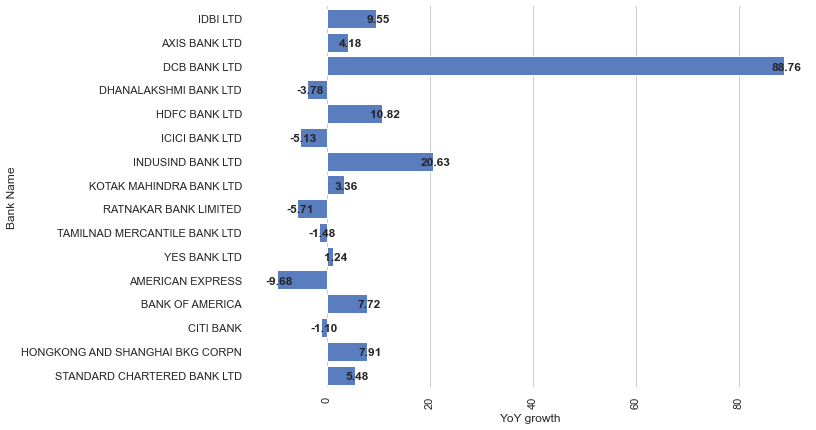

In [153]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
sns.set_color_codes('muted')
plt.figure(figsize=(10,7))
ax=sns.barplot(x='YoY growth', y='Bank Name', data=check, color='b',ci='None')
plt.xticks(rotation=90)
sns.despine(left=True, bottom=True)

for p in ax.patches:
    width = p.get_width()
    plt.text(0.5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center',fontweight='bold')

In [154]:
prac=df_2018_copy.sort_values(by='CC_ATM_PTransac_1',ascending=False).head(10)
prac

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,POS_Offline,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount,bank_type,DC_ATM_PTransac_1,CC_ATM_PTransac_1,DC_POS_PTransac_2018,CC_POS_PTransac_2018
42,BANK OF AMERICA,0,0,0,0,18377,153,51751,1376244.94000,371448105.80000,0,0,0,0.00000,0.00000,Private Bank,0.00000,8995.06497,0.00000,7177.60248
47,HONGKONG AND SHANGHAI BKG CORPN,45,52,0,0,600561,4344,1550336,31823640.00000,4662768212.00000,395054,317474,600510,1562752220.00000,1047483295.00000,Private Bank,4922.45734,7325.88398,1744.32282,3007.58559
41,AMERICAN EXPRESS,0,0,39869,0,1221324,2943,6181592,20520700.00000,50108607298.00000,0,0,0,0.00000,0.00000,Private Bank,0.00000,6972.71492,0.00000,8106.10071
44,CITI BANK,47,496,34821,0,2598745,40615,19261225,233446436.00000,43933834236.00000,1620835,2212457,5300086,8652904693.00000,9160268148.00000,Private Bank,3910.99339,5747.78865,1728.32444,2280.94704
3,BANK OF INDIA,3328,4095,96203,0,210861,28175,345423,152405644.00000,920836160.00000,53915764,31035304,11596481,70374626407.92000,9930968648.53000,Government Bank,2267.56685,5409.25090,856.37778,2665.82179
28,HDFC BANK LTD,5877,6829,414056,0,10990935,181659,38322777,960946011.00000,129692864257.00000,24939721,33711489,41316850,173978056800.00000,58593247596.00000,Private Bank,5160.79420,5289.83431,1418.14411,3384.22407
5,CANARA BANK,5034,4228,19209,0,223101,30604,419655,156144293.09000,910260387.70000,45129796,21543169,10261870,92469200769.85001,13864330464.31000,Government Bank,4292.27477,5102.08774,1351.05302,2169.06837
31,INDUSIND BANK LTD,994,1238,37269,0,820224,14600,2671526,73965067.56000,17587310730.65000,3935883,2870930,2243294,13556160787.58000,3484789736.82000,Private Bank,4721.87089,5066.10052,1553.42534,6583.24521
9,INDIAN BANK,2725,646,11443,0,85324,3416,137825,17100000.00000,35000000.00000,18469723,26931068,5499320,73500700000.00000,6547300000.00000,Government Bank,2729.21594,5005.85480,1190.56538,253.94522
48,STANDARD CHARTERED BANK LTD,102,139,0,0,1282712,5595,4702272,27881227.00000,10950317256.00000,1112022,2000606,2812051,6601898484.00000,3129233242.00000,Private Bank,3299.94936,4983.23986,1112.79392,2328.72902


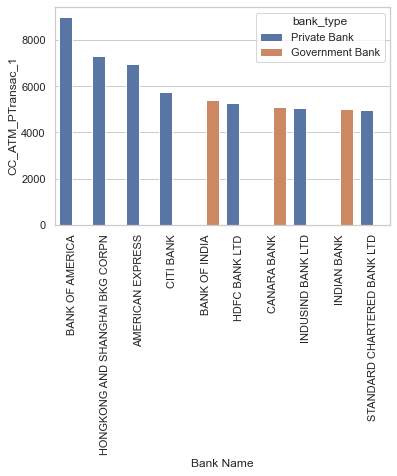

In [155]:
sns.barplot(data=prac,x='Bank Name',y='CC_ATM_PTransac_1',hue='bank_type')
plt.xticks(rotation=90)
plt.show()

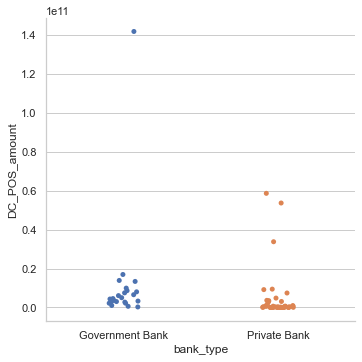

In [156]:
sns.catplot(data=df_2018_copy,x='bank_type',y='DC_POS_amount',)

In [157]:
new_private_df.head(2)

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount,DC_ATM_PTransac,bank_type,DC_POS_PTransac,CC_POS_PTransac_CC,CC_ATM_PTransac
17,IDBI LTD,2205,1497,34974,33317,953,137806,5008875.67000,340514446.60000,12108214,9701166,6327793,43178961328.47000,8687716444.37000,4450.90429,Private Bank,1372.94574,2470.96967,5255.90312
19,AXIS BANK LTD,5257,11631,496598,6170677,102603,16677302,442642055.00000,64455153075.00000,24185091,29505062,28524901,147832522598.69000,43053137845.00000,5010.41220,Private Bank,1509.31770,3864.84295,4314.12390


In [158]:
z3=new_private_df.CC_POS_PTransac_CC.mean()
z3

1687.4767661483063

In [159]:
pvt2019_pos_graph=new_private_df.sort_values('CC_POS_PTransac_CC',ascending=False).head(15)

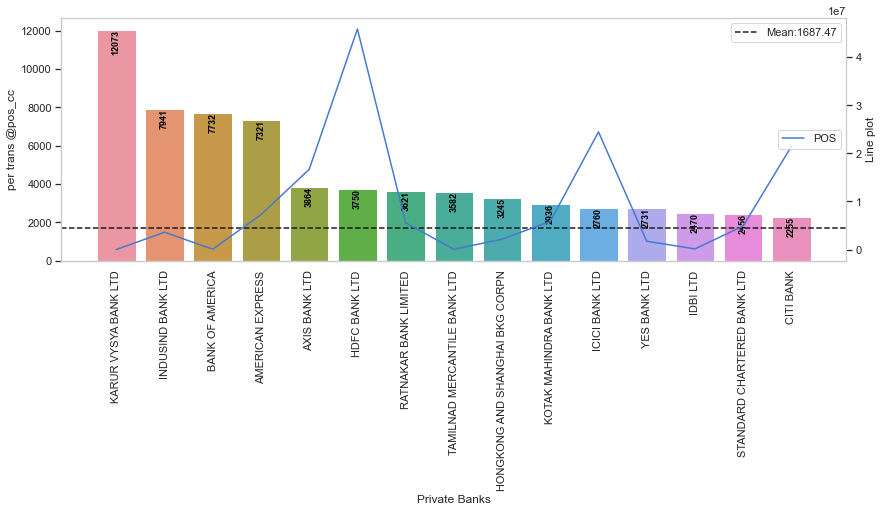

In [160]:
plot=sns.catplot(x="Bank Name",y="CC_POS_PTransac_CC",data=pvt2019_pos_graph,kind='bar',height=4,aspect=3)#uepalette='cubehelix'
plt.axhline(z3,color='k',linestyle="--",label='Mean:1687.47')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel("Private Banks")
plt.ylabel("per trans @pos_cc")

for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i, # bar index (x coordinate of text)
        h+10, # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center', 
        va='top', 
        color='black',
        fontweight='bold',
        rotation=90,
        size=9)
plt.grid(False)

x = pvt2019_pos_graph["Bank Name"]
y = pvt2019_pos_graph["CC_POS_Transaction"]
axes2 = plt.twinx()
axes2.plot(x, y, color='b',label='POS')
axes2.set_ylabel('Line plot')
plt.grid(False)
plt.legend(loc='right')


In [161]:
pvt2019_pos_dc_graph=new_private_df.sort_values('DC_POS_Transaction',ascending=False).head(15)

In [162]:
z4=pvt2019_pos_dc_graph.DC_POS_PTransac.mean()

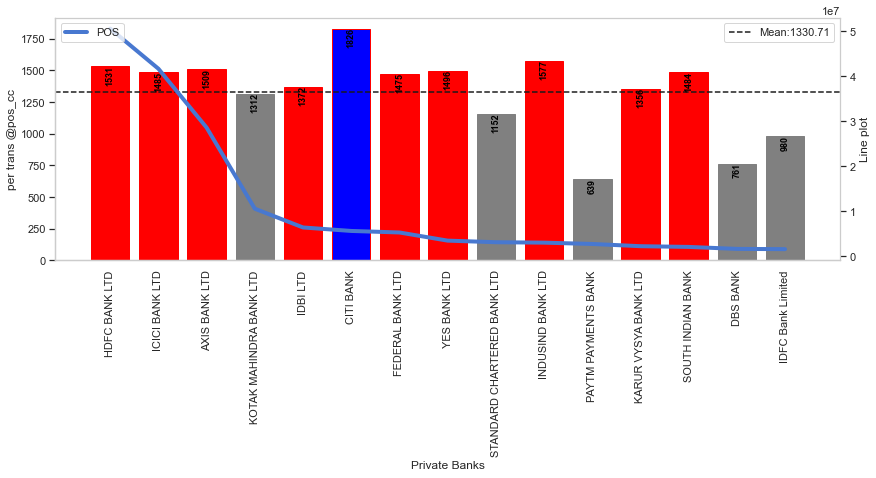

In [163]:
plot=sns.catplot(x="Bank Name",y="DC_POS_PTransac",data=pvt2019_pos_dc_graph,kind='bar',height=4,aspect=3,palette='flare')#uepalette='cubehelix'
plt.axhline(z4,color='k',linestyle="--",label='Mean:1330.71')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel("Private Banks")
plt.ylabel("per trans @pos_cc")

for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i, # bar index (x coordinate of text)
        h+10, # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center', 
        va='top', 
        color='black',
        fontweight='bold',
        rotation=90,
        size=9)
plt.grid(False)

patch_h = [] 
for bar in plot.ax.patches:
    if bar.get_height() > z4:
        bar.set_color('red')    
    else:
        bar.set_color('grey')

for bar in plot.ax.patches:
    reading = bar.get_height()
    patch_h.append(reading)        
idx_tallest = np.argmax(patch_h)
plot.ax.patches[idx_tallest].set_facecolor('blue')


x = pvt2019_pos_dc_graph["Bank Name"]
y = pvt2019_pos_dc_graph["DC_POS_Transaction"]
axes2 = plt.twinx()
axes2.plot(x, y, color='b',label='POS',lw='4')
axes2.set_ylabel('Line plot')
plt.grid(False)
plt.legend(loc='upper left')


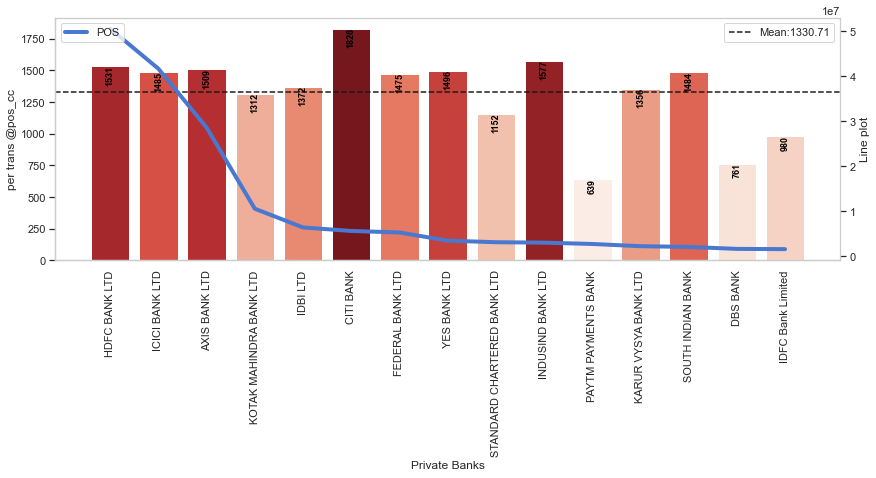

In [164]:
pal = sns.color_palette("Reds_r", len(pvt2019_pos_dc_graph['DC_POS_PTransac']))
rank = (pvt2019_pos_dc_graph['DC_POS_PTransac']).argsort().argsort()

plot=sns.catplot(x="Bank Name",y="DC_POS_PTransac",data=pvt2019_pos_dc_graph,kind='bar',height=4,aspect=3,palette=np.array(pal[::-1])[rank])#uepalette='cubehelix'
plt.axhline(z4,color='k',linestyle="--",label='Mean:1330.71')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel("Private Banks")
plt.ylabel("per trans @pos_cc")

for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i, # bar index (x coordinate of text)
        h+10, # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center', 
        va='top', 
        color='black',
        fontweight='bold',
        rotation=90,
        size=9)
plt.grid(False)

x = pvt2019_pos_dc_graph["Bank Name"]
y = pvt2019_pos_dc_graph["DC_POS_Transaction"]
axes2 = plt.twinx()
axes2.plot(x, y, color='b',label='POS',lw='4')
axes2.set_ylabel('Line plot')
plt.grid(False)
plt.legend(loc='upper left')


In [165]:
check_pvt=new_private_df

In [166]:
nan_value=float("Nan")
check_pvt.replace(0,nan_value,inplace=True)

C:\Users\sanyalam\Anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [167]:
check_pvt_CCATM=check_pvt[check_pvt['CC_ATM_PTransac'].notna()]

In [168]:
check_pvt_CCATM.head(2)

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount,DC_ATM_PTransac,bank_type,DC_POS_PTransac,CC_POS_PTransac_CC,CC_ATM_PTransac
17,IDBI LTD,2205.00000,1497.00000,34974.00000,33317.00000,953.00000,137806.00000,5008875.67000,340514446.60000,12108214.00000,9701166.00000,6327793.00000,43178961328.47000,8687716444.37000,4450.90429,Private Bank,1372.94574,2470.96967,5255.90312
19,AXIS BANK LTD,5257.00000,11631.00000,496598.00000,6170677.00000,102603.00000,16677302.00000,442642055.00000,64455153075.00000,24185091.00000,29505062.00000,28524901.00000,147832522598.69000,43053137845.00000,5010.41220,Private Bank,1509.31770,3864.84295,4314.12390


In [169]:
z5=check_pvt_CCATM.CC_ATM_PTransac.mean()
z5

5473.996066945428

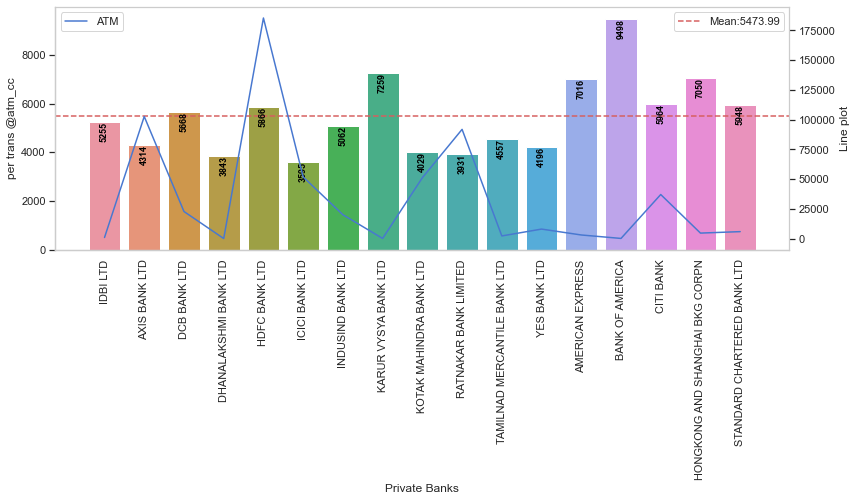

In [170]:
plot=sns.catplot(x="Bank Name",y="CC_ATM_PTransac",data=check_pvt_CCATM,kind='bar',height=4,aspect=3)#uepalette='cubehelix'
plt.axhline(z5,color='r',linestyle="--",label='Mean:5473.99')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel("Private Banks")
plt.ylabel("per trans @atm_cc")

for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i, # bar index (x coordinate of text)
        h+10, # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center', 
        va='top', 
        color='black',
        fontweight='bold',
        rotation=90,
        size=9)
plt.grid(False)

x = check_pvt_CCATM["Bank Name"]
y = check_pvt_CCATM["CC_ATM_Transaction"]
axes2 = plt.twinx()
axes2.plot(x, y, color='b',label='ATM')
axes2.set_ylabel('Line plot')
plt.grid(False)
plt.legend(loc='upper left')


In [171]:
check_pvt_DCATM=check_pvt[check_pvt['DC_ATM_PTransac'].notna()]
check_pvt_DCATM=check_pvt_DCATM.sort_values('POS_Online',ascending=False).head(10)

In [172]:
check_pvt_DCATM

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount,DC_ATM_PTransac,bank_type,DC_POS_PTransac,CC_POS_PTransac_CC,CC_ATM_PTransac
34,RATNAKAR BANK LIMITED,235.00000,136.00000,737103.00000,1924849.00000,91799.00000,5567948.00000,360947588.97000,20164199772.92000,733604.00000,842691.00000,607422.00000,2875337326.54000,771002742.14002,3412.08975,Private Bank,1269.30329,3621.47775,3931.93378
26,HDFC BANK LTD,6081.00000,7239.00000,563264.00000,12679846.00000,185365.00000,45870315.00000,1087520462.00000,172032732880.00000,27924345.00000,38952187.00000,50527755.00000,202573626136.00000,77378677547.00000,5200.57131,Private Bank,1531.40937,3750.41534,5866.91372
19,AXIS BANK LTD,5257.00000,11631.00000,496598.00000,6170677.00000,102603.00000,16677302.00000,442642055.00000,64455153075.00000,24185091.00000,29505062.00000,28524901.00000,147832522598.69000,43053137845.00000,5010.41220,Private Bank,1509.31770,3864.84295,4314.12390
27,ICICI BANK LTD,5214.00000,9849.00000,359529.00000,7013846.00000,51851.00000,24462656.00000,186429680.00000,67520545509.00000,44806067.00000,34951713.00000,41611367.00000,180612001998.00000,61794689021.00000,5167.47211,Private Bank,1485.04347,2760.14777,3595.48861
38,YES BANK LTD,937.00000,385.00000,120641.00000,550295.00000,8021.00000,1730904.00000,33660133.87000,4728713311.65000,2522043.00000,3298836.00000,3401664.00000,14639155968.00000,5089897750.39000,4437.67316,Private Bank,1496.29645,2731.93274,4196.50092
29,INDUSIND BANK LTD,1097.00000,1493.00000,95839.00000,1124701.00000,20068.00000,3603516.00000,101589486.03000,28616414453.87000,4957426.00000,3916820.00000,2953363.00000,17556028883.91000,4659401000.00000,4482.21488,Private Bank,1577.65943,7941.24806,5062.26261
42,CITI BANK,47.00000,477.00000,35001.00000,2714145.00000,37056.00000,21450962.00000,221007785.00000,48391008362.00000,1631766.00000,2096700.00000,5552823.00000,8644370452.00000,10141970107.00000,4122.84564,Private Bank,1826.45298,2255.88989,5964.15655
17,IDBI LTD,2205.00000,1497.00000,34974.00000,33317.00000,953.00000,137806.00000,5008875.67000,340514446.60000,12108214.00000,9701166.00000,6327793.00000,43178961328.47000,8687716444.37000,4450.90429,Private Bank,1372.94574,2470.96967,5255.90312
20,BANDHAN BANK LTD,481.00000,nan,27295.00000,nan,nan,nan,nan,nan,2915615.00000,2140338.00000,939112.00000,8028258930.00000,1438544988.57000,3750.93043,Private Bank,1531.81408,nan,nan
33,KOTAK MAHINDRA BANK LTD,1192.00000,1199.00000,26103.00000,2093315.00000,51157.00000,5856865.00000,206131892.51000,17200119038.67000,12988699.00000,8959368.00000,10497147.00000,35825381785.04000,13778331147.30998,3998.65055,Private Bank,1312.57866,2936.74501,4029.39759


In [173]:
z6=check_pvt_DCATM.DC_ATM_PTransac.mean()
z6

4403.376430917331

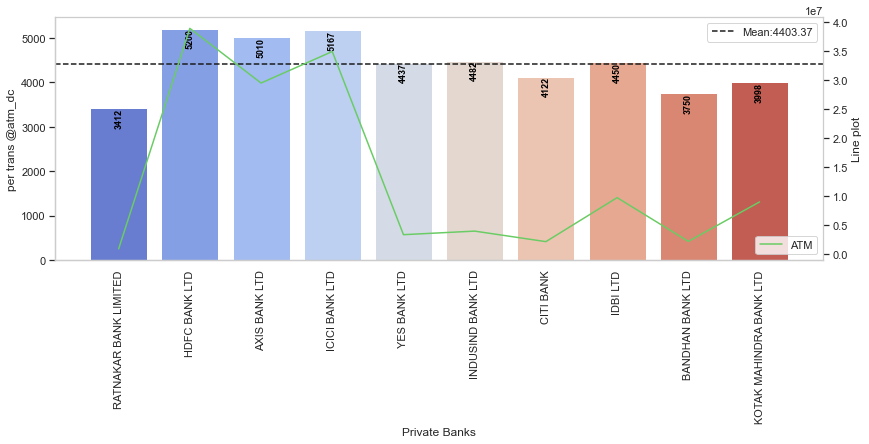

In [174]:
plot=sns.catplot(x="Bank Name",y="DC_ATM_PTransac",data=check_pvt_DCATM,kind='bar',height=4,aspect=3,palette='coolwarm')#uepalette='cubehelix'
plt.axhline(z6,color='k',linestyle="--",label='Mean:4403.37')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel("Private Banks")
plt.ylabel("per trans @atm_dc")

for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i, # bar index (x coordinate of text)
        h+10, # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center', 
        va='top', 
        color='black',
        fontweight='bold',
        rotation=90,
        size=9)
plt.grid(False)


x = check_pvt_DCATM["Bank Name"]
y = check_pvt_DCATM["DC_ATM_Transaction"]
axes2 = plt.twinx()
axes2.plot(x, y, color='g',label='ATM')
axes2.set_ylabel('Line plot')
plt.grid(False)
plt.legend(loc='lower right')


In [175]:
check_pvt[check_pvt['Bank Name']=='HDFC BANK LTD']

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount,DC_ATM_PTransac,bank_type,DC_POS_PTransac,CC_POS_PTransac_CC,CC_ATM_PTransac
26,HDFC BANK LTD,6081.00000,7239.00000,563264.00000,12679846.00000,185365.00000,45870315.00000,1087520462.00000,172032732880.00000,27924345.00000,38952187.00000,50527755.00000,202573626136.00000,77378677547.00000,5200.57131,Private Bank,1531.40937,3750.41534,5866.91372


In [176]:
check_pvt_DCATM1=check_pvt[check_pvt['DC_ATM_PTransac'].notna()]

In [177]:
check_pvt_DCATM1=check_pvt_DCATM1.sort_values(by='DC_ATM_PTransac',ascending=False).head(5)

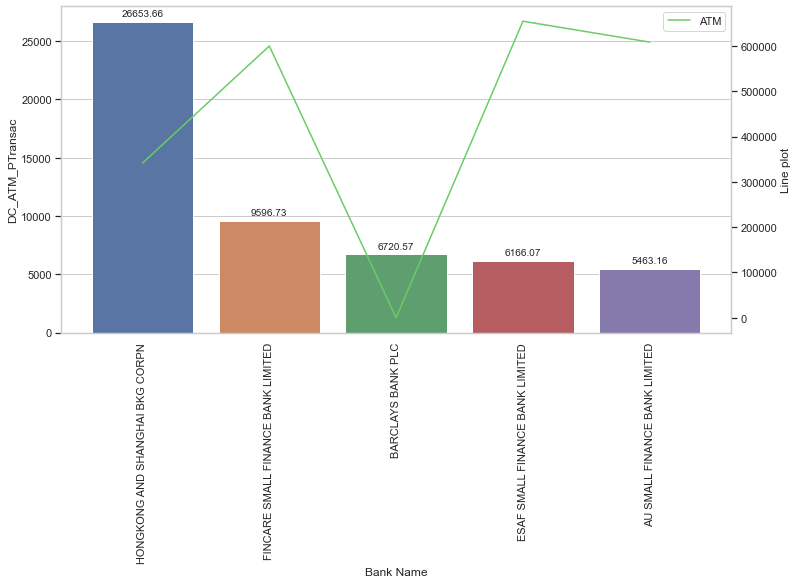

In [178]:
plt.figure(figsize=(12,6))
plots = sns.barplot(x=check_pvt_DCATM1['Bank Name'], y=check_pvt_DCATM1['DC_ATM_PTransac'],data=check_pvt_DCATM1)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=10, xytext=(0, 8),
                       textcoords='offset points')

plt.xticks(rotation=90)
x = check_pvt_DCATM1["Bank Name"]
y = check_pvt_DCATM1["DC_ATM_Transaction"]
axes2 = plt.twinx()
plots1=axes2.plot(x, y, color='g',label='ATM')
axes2.set_ylabel('Line plot')
plt.grid(False)
plt.legend(loc='upper right')

plt.show()

In [179]:
n_df1=n_df.copy()

In [180]:
criteria14=n_df1['bank_type']=='Government Bank'
govt_both_2019df=n_df1[criteria14]

In [181]:
nan_value=float("Nan")
govt_both_2019df.replace(0,nan_value,inplace=True)

C:\Users\sanyalam\Anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [182]:
check_govt_CCPOS=govt_both_2019df[govt_both_2019df['CC_POS_PTransac_CC'].notna()]

In [183]:
z7=check_govt_CCPOS.CC_POS_PTransac_CC.mean()
z7

2555.0639416295808

Text(0, 0.5, 'Line plot')

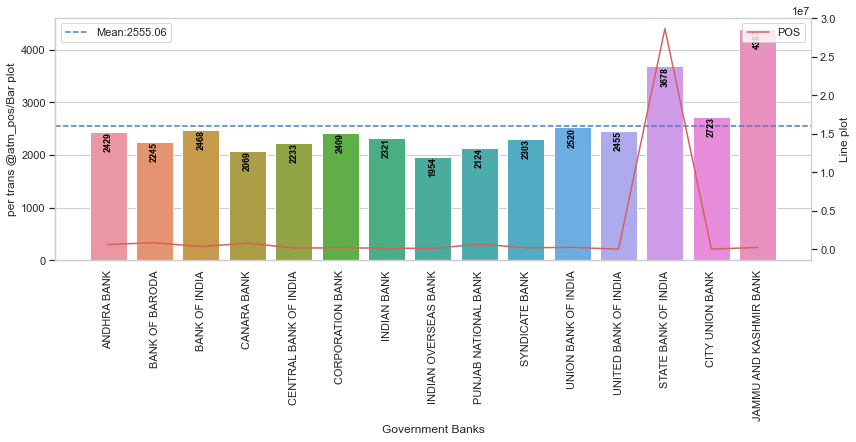

In [184]:
import numpy as np
plot=sns.catplot(x="Bank Name",y="CC_POS_PTransac_CC",data=check_govt_CCPOS,kind='bar',height=4,aspect=3)#palette='cubehelix'
plt.axhline(z7,color='b',linestyle="--",label='Mean:2555.06')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel("Government Banks")
plt.ylabel("per trans @atm_pos/Bar plot")

for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i, # bar index (x coordinate of text)
        h+10, # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center', 
        va='top', 
        color='black',
        fontweight='bold',
        rotation=90,
        size=9)

x = check_govt_CCPOS["Bank Name"]
y = check_govt_CCPOS["CC_POS_Transaction"]
axes2 = plt.twinx()
axes2.plot(x, y, color='r',label='POS')
plt.legend()
plt.grid(False)
axes2.set_ylabel('Line plot')


In [185]:
check_govt_CCPOS_1=check_govt_CCPOS.sort_values('POS_Online',ascending=False).head(10)

In [186]:
z8=check_govt_CCPOS_1.CC_POS_PTransac_CC.mean()
z8

2628.9584910045987

Text(0, 0.5, 'Line plot')

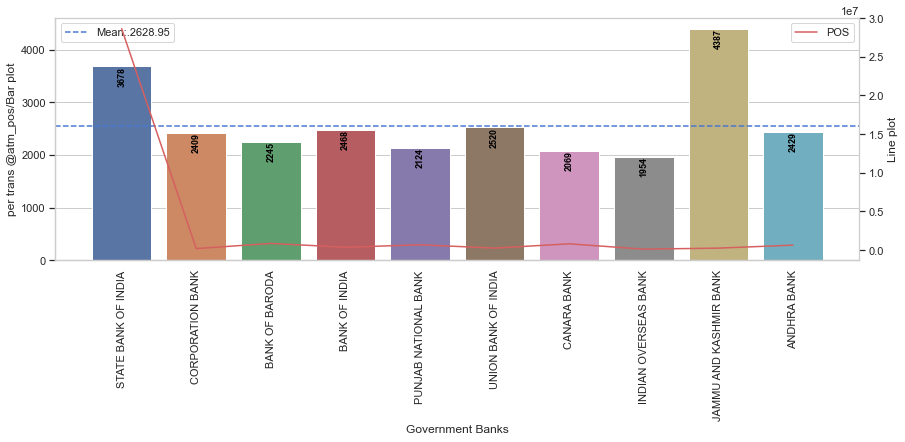

In [187]:
import numpy as np
plot=sns.catplot(x="Bank Name",y="CC_POS_PTransac_CC",data=check_govt_CCPOS_1,kind='bar',height=4,aspect=3)#palette='cubehelix'
plt.axhline(z7,color='b',linestyle="--",label='Mean:.2628.95')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel("Government Banks")
plt.ylabel("per trans @atm_pos/Bar plot")

for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i, # bar index (x coordinate of text)
        h+10, # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center', 
        va='top', 
        color='black',
        fontweight='bold',
        rotation=90,
        size=9)

x = check_govt_CCPOS_1["Bank Name"]
y = check_govt_CCPOS_1["CC_POS_Transaction"]
axes2 = plt.twinx()
axes2.plot(x, y, color='r',label='POS')
plt.legend()
plt.grid(False)
axes2.set_ylabel('Line plot')


In [188]:
govt_both_2019df.head(2)

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount,DC_ATM_PTransac,bank_type,DC_POS_PTransac,CC_POS_PTransac_CC,CC_ATM_PTransac
0,ALLAHABAD BANK,761,196,3116,nan,nan,nan,nan,nan,5910582,9068676,3259136,22773785278.95000,3491793270.59000,2511.25801,Government Bank,1071.38618,nan,nan
1,ANDHRA BANK,3023,773,13777,303397.00000,13624.00000,615600.00000,62738464.84000,1495788702.04000,28852129,10811586,6953162,38154666442.14000,9341300000.00000,3529.05360,Government Bank,1343.46072,2429.80621,4604.99595


In [189]:
check_govt_CCATM=govt_both_2019df[govt_both_2019df['CC_ATM_PTransac'].notna()]

In [190]:
z8=check_govt_CCATM.CC_ATM_PTransac.mean()
z8

4425.595472601786

Text(0, 0.5, 'Line plot')

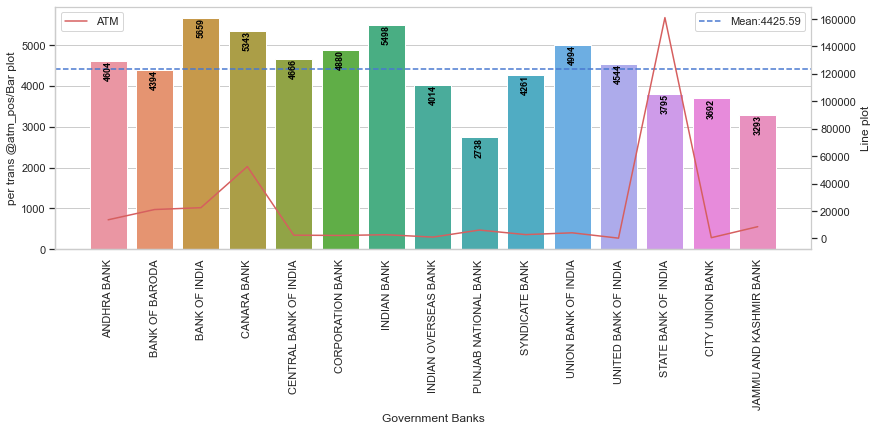

In [191]:
import numpy as np
plot=sns.catplot(x="Bank Name",y="CC_ATM_PTransac",data=check_govt_CCATM,kind='bar',height=4,aspect=3)#palette='cubehelix'
plt.axhline(z8,color='b',linestyle="--",label='Mean:4425.59')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel("Government Banks")
plt.ylabel("per trans @atm_pos/Bar plot")

for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i, # bar index (x coordinate of text)
        h+10, # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center', 
        va='top', 
        color='black',
        fontweight='bold',
        rotation=90,
        size=9)

x = check_govt_CCATM["Bank Name"]
y = check_govt_CCATM["CC_ATM_Transaction"]
axes2 = plt.twinx()
axes2.plot(x, y, color='r',label='ATM')
plt.legend(loc='upper left')
plt.grid(False)
axes2.set_ylabel('Line plot')


In [192]:
check_govt_CCATM_1=check_govt_CCATM.sort_values(by='ATM_Offsite',ascending=False).head(10)
check_govt_CCATM_1

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount,DC_ATM_PTransac,bank_type,DC_POS_PTransac,CC_POS_PTransac_CC,CC_ATM_PTransac
18,STATE BANK OF INDIA,25606,32883,589127,8734604.00000,160944.00000,28644056.00000,610928567.00000,105373145348.94002,297165746,376403513,117026441,1130261407353.59009,176121198837.14001,3002.79187,Government Bank,1504.96928,3678.70896,3795.90769
5,CANARA BANK,4760,4077,21910,381745.00000,52412.00000,786726.00000,280075180.00000,1628261231.00000,18437346,23759272,12679492,103930213653.00000,17451547785.00000,4374.30127,Government Bank,1376.36017,2069.66750,5343.72243
2,BANK OF BARODA,9321,3850,78791,324275.00000,21107.00000,838895.00000,92758063.77000,1883972069.87000,48888337,32035602,16675739,125633462025.57001,14651528984.77000,3921.68257,Government Bank,878.61347,2245.77816,4394.65882
12,PUNJAB NATIONAL BANK,5225,3714,67277,355448.00000,6157.00000,661531.00000,16859639.20000,1405406032.12000,20825477,24617942,14199327,111699263912.03999,19723260247.36000,4537.31120,Government Bank,1389.02782,2124.47494,2738.28800
3,BANK OF INDIA,2645,3509,67740,185605.00000,22457.00000,344241.00000,127086755.17000,849792204.89000,36822577,19297659,10305371,70860315524.78000,11220117555.63000,3671.96433,Government Bank,1088.76406,2468.59672,5659.11543
15,UNION BANK OF INDIA,3933,2720,51096,48018.00000,4144.00000,235162.00000,20698041.02000,592784465.28000,17056791,28094005,10022853,87674177983.00000,11467805176.71000,3120.74330,Government Bank,1144.16576,2520.74938,4994.70102
16,UNITED BANK OF INDIA,996,1021,5553,7568.00000,255.00000,8665.00000,1158900.00000,21275091.38000,8350636,7743460,2295877,28120892333.00000,2956296325.00000,3631.56681,Government Bank,1287.65449,2455.29041,4544.70588
6,CENTRAL BANK OF INDIA,2668,896,3384,92317.00000,2422.00000,163157.00000,11303391.28000,364376545.55000,21197500,11821816,6037334,49359594926.00000,8047998536.08000,4175.29717,Government Bank,1333.03848,2233.28785,4666.96585
1,ANDHRA BANK,3023,773,13777,303397.00000,13624.00000,615600.00000,62738464.84000,1495788702.04000,28852129,10811586,6953162,38154666442.14000,9341300000.00000,3529.05360,Government Bank,1343.46072,2429.80621,4604.99595
8,INDIAN BANK,3198,696,10938,87772.00000,2746.00000,149605.00000,15100000.00000,347300000.00000,14590113,34024067,7691534,69254300000.00000,9144100000.00000,2035.45038,Government Bank,1188.85257,2321.44648,5498.90750


In [193]:
z9=check_govt_CCATM_1.CC_ATM_PTransac.mean()
z9

4624.19685667687

Text(0, 0.5, 'Line plot')

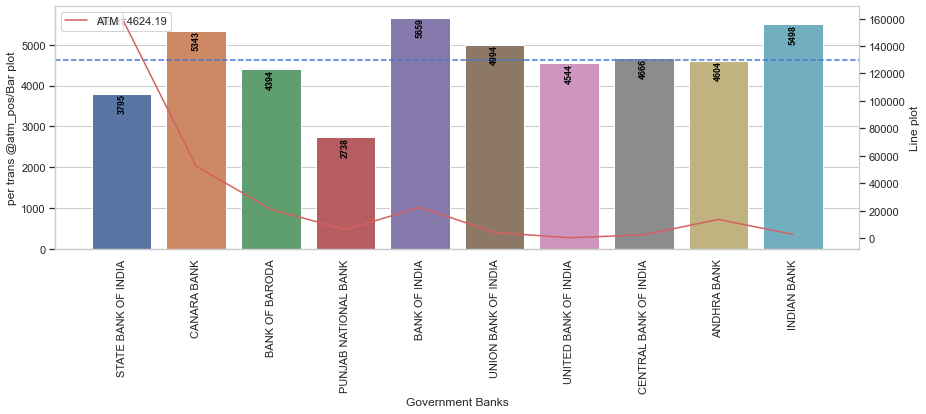

In [194]:
import numpy as np
plot=sns.catplot(x="Bank Name",y="CC_ATM_PTransac",data=check_govt_CCATM_1,kind='bar',height=4,aspect=3)#palette='cubehelix'
plt.axhline(z9,color='b',linestyle="--",label='Mean:4624.19')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel("Government Banks")
plt.ylabel("per trans @atm_pos/Bar plot")

for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i, # bar index (x coordinate of text)
        h+10, # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center', 
        va='top', 
        color='black',
        fontweight='bold',
        rotation=90,
        size=9)

x = check_govt_CCATM_1["Bank Name"]
y = check_govt_CCATM_1["CC_ATM_Transaction"]
axes2 = plt.twinx()
axes2.plot(x, y, color='r',label='ATM')
plt.legend(loc='upper left')
plt.grid(False)
axes2.set_ylabel('Line plot')


In [195]:
govt_check_12=govt_both_2019df.assign(ATM_Total=govt_both_2019df['ATM_Offsite']+govt_both_2019df['ATM_Onsite'])

In [196]:
check_govt_CCATM_12=govt_check_12.sort_values('ATM_Total',ascending=False).head(10)

In [197]:
z10=check_govt_CCATM_12.CC_ATM_PTransac.mean()
z10

4595.873400576882

Text(0, 0.5, 'Line plot')

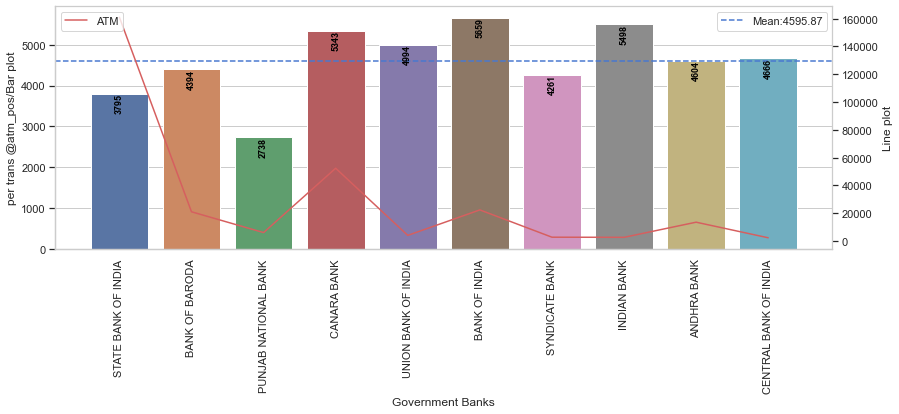

In [198]:
import numpy as np
plot=sns.catplot(x="Bank Name",y="CC_ATM_PTransac",data=check_govt_CCATM_12,kind='bar',height=4,aspect=3)#palette='cubehelix'
plt.axhline(z10,color='b',linestyle="--",label='Mean:4595.87')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel("Government Banks")
plt.ylabel("per trans @atm_pos/Bar plot")

for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i, # bar index (x coordinate of text)
        h+10, # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center', 
        va='top', 
        color='black',
        fontweight='bold',
        rotation=90,
        size=9)

x = check_govt_CCATM_12["Bank Name"]
y = check_govt_CCATM_12["CC_ATM_Transaction"]
axes2 = plt.twinx()
axes2.plot(x, y, color='r',label='ATM')
plt.legend(loc='upper left')
plt.grid(False)
axes2.set_ylabel('Line plot')


In [199]:
a33=check_govt_CCATM_12[['Bank Name','ATM_Total','CC_ATM_PTransac','CC_ATM_Transaction']]

In [200]:
a33.set_index('Bank Name')

,ATM_Total,CC_ATM_PTransac,CC_ATM_Transaction
Bank Name,,,
STATE BANK OF INDIA,58489,3795.90769,160944.00000
BANK OF BARODA,13171,4394.65882,21107.00000
PUNJAB NATIONAL BANK,8939,2738.28800,6157.00000
CANARA BANK,8837,5343.72243,52412.00000
UNION BANK OF INDIA,6653,4994.70102,4144.00000
BANK OF INDIA,6154,5659.11543,22457.00000
SYNDICATE BANK,4531,4261.47132,2838.00000
INDIAN BANK,3894,5498.90750,2746.00000
ANDHRA BANK,3796,4604.99595,13624.00000


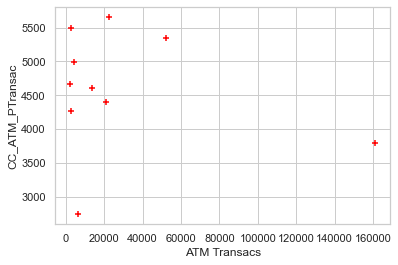

In [201]:
%matplotlib inline
plt.xlabel('ATM Transacs')
plt.ylabel('CC_ATM_PTransac')
plt.scatter(a33.CC_ATM_Transaction,a33.CC_ATM_PTransac,color='red',marker="+")

In [202]:
new_private_df_2018.head(1)

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,POS_Offline,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount,bank_type,DC_ATM_PTransac_1,CC_ATM_PTransac_1,DC_POS_PTransac_2018,CC_POS_PTransac_2018
19,IDBI LTD,2185,1554,30102,0,28773,824,158789,3991842.95000,358162146.94000,11697817,8922033,7331453,39397488167.00999,7418554703.67000,Private Bank,4415.75235,4844.46960,1011.88055,2255.58538


In [203]:
bin_private_2018=new_private_df_2018[['Bank Name','DC_POS_PTransac_2018','CC_POS_PTransac_2018','POS_Online','CC_POS_Transaction','DC_POS_Transaction']]

In [204]:
bin_private_2018.set_index('Bank Name').head(1)

,DC_POS_PTransac_2018,CC_POS_PTransac_2018,POS_Online,CC_POS_Transaction,DC_POS_Transaction
Bank Name,,,,,
IDBI LTD,1011.88055,2255.58538,30102,158789,7331453


In [205]:
nan_value=float("Nan")
bin_private_2018.replace(0,nan_value,inplace=True)

C:\Users\sanyalam\Anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [206]:
bin_private_2018

,Bank Name,DC_POS_PTransac_2018,CC_POS_PTransac_2018,POS_Online,CC_POS_Transaction,DC_POS_Transaction
19,IDBI LTD,1011.88055,2255.58538,30102.00000,158789.00000,7331453.00000
21,AXIS BANK LTD,1464.20500,3709.81480,505792.00000,13127005.00000,23046431.00000
22,BANDHAN BANK LTD,1535.20296,nan,22401.00000,nan,610698.00000
23,CATHOLIC SYRIAN BANK LTD,1848.98584,nan,nan,nan,165740.00000
25,DCB BANK LTD,1903.62962,933.88803,1580.00000,73901.00000,307424.00000
26,DHANALAKSHMI BANK LTD,1583.41543,2133.33501,1114.00000,16340.00000,225660.00000
27,FEDERAL BANK LTD,1524.88152,nan,11049.00000,nan,3155567.00000
28,HDFC BANK LTD,1418.14411,3384.22407,414056.00000,38322777.00000,41316850.00000
29,ICICI BANK LTD,1447.91513,2909.49348,333074.00000,18566905.00000,37037674.00000
30,IDFC Bank Limited,856.03983,nan,1642.00000,nan,835786.00000


In [207]:
bin_pvt_DCPOS=bin_private_2018[bin_private_2018['DC_POS_PTransac_2018'].notna()]

In [208]:
bin_pvt_DCPOS

,Bank Name,DC_POS_PTransac_2018,CC_POS_PTransac_2018,POS_Online,CC_POS_Transaction,DC_POS_Transaction
19,IDBI LTD,1011.88055,2255.58538,30102.00000,158789.00000,7331453.00000
21,AXIS BANK LTD,1464.20500,3709.81480,505792.00000,13127005.00000,23046431.00000
22,BANDHAN BANK LTD,1535.20296,nan,22401.00000,nan,610698.00000
23,CATHOLIC SYRIAN BANK LTD,1848.98584,nan,nan,nan,165740.00000
25,DCB BANK LTD,1903.62962,933.88803,1580.00000,73901.00000,307424.00000
26,DHANALAKSHMI BANK LTD,1583.41543,2133.33501,1114.00000,16340.00000,225660.00000
27,FEDERAL BANK LTD,1524.88152,nan,11049.00000,nan,3155567.00000
28,HDFC BANK LTD,1418.14411,3384.22407,414056.00000,38322777.00000,41316850.00000
29,ICICI BANK LTD,1447.91513,2909.49348,333074.00000,18566905.00000,37037674.00000
30,IDFC Bank Limited,856.03983,nan,1642.00000,nan,835786.00000


In [209]:
def binfunction(col,cut_points,labels=None):
    minval=col.min()
    maxval=col.max()
    break_points=[minval]+cut_points+[maxval]
    print(break_points)
    if not labels:
        labels=range(len(cut_points)+1)
    colBin=pd.cut(col,bins=break_points,labels=labels,include_lowest=True,duplicates="drop")
    return colBin

In [210]:
cut_points=[500,1000,1500]
labels=["Low","Average","Above average","High"]
bin_pvt_DCPOS["Combined_category_DC"]=binfunction(bin_pvt_DCPOS["DC_POS_PTransac_2018"],cut_points,labels)
bin_pvt_DCPOS.head(1)

[79.93376486527171, 500, 1000, 1500, 5725.9616000000005]


<ipython-input-210-0b5df6e52abc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_pvt_DCPOS["Combined_category_DC"]=binfunction(bin_pvt_DCPOS["DC_POS_PTransac_2018"],cut_points,labels)


,Bank Name,DC_POS_PTransac_2018,CC_POS_PTransac_2018,POS_Online,CC_POS_Transaction,DC_POS_Transaction,Combined_category_DC
19,IDBI LTD,1011.88055,2255.58538,30102.00000,158789.00000,7331453.00000,Above average


In [216]:
bin_pvt_DCPOS.drop(columns=['CC_POS_PTransac_2018','CC_POS_Transaction'],axis=1)

,Bank Name,DC_POS_PTransac_2018,POS_Online,DC_POS_Transaction,Combined_category_DC
19,IDBI LTD,1011.88055,30102.00000,7331453.00000,Above average
21,AXIS BANK LTD,1464.20500,505792.00000,23046431.00000,Above average
22,BANDHAN BANK LTD,1535.20296,22401.00000,610698.00000,High
23,CATHOLIC SYRIAN BANK LTD,1848.98584,nan,165740.00000,High
25,DCB BANK LTD,1903.62962,1580.00000,307424.00000,High
26,DHANALAKSHMI BANK LTD,1583.41543,1114.00000,225660.00000,High
27,FEDERAL BANK LTD,1524.88152,11049.00000,3155567.00000,High
28,HDFC BANK LTD,1418.14411,414056.00000,41316850.00000,Above average
29,ICICI BANK LTD,1447.91513,333074.00000,37037674.00000,Above average
30,IDFC Bank Limited,856.03983,1642.00000,835786.00000,Average


In [212]:
bin_pvt_DCPOS['Combined_category_DC'].value_counts()

High             14
Above average    13
Average           6
Low               4
Name: Combined_category_DC, dtype: int64

In [218]:
high_pvt_2018_dcpos=bin_pvt_DCPOS[(bin_pvt_DCPOS['Combined_category_DC']=='High')]

In [221]:
high_pvt_2018_dcpos.drop(['CC_POS_PTransac_2018','CC_POS_Transaction'],axis=1)

KeyError: "['CC_POS_PTransac_2018' 'CC_POS_Transaction'] not found in axis"

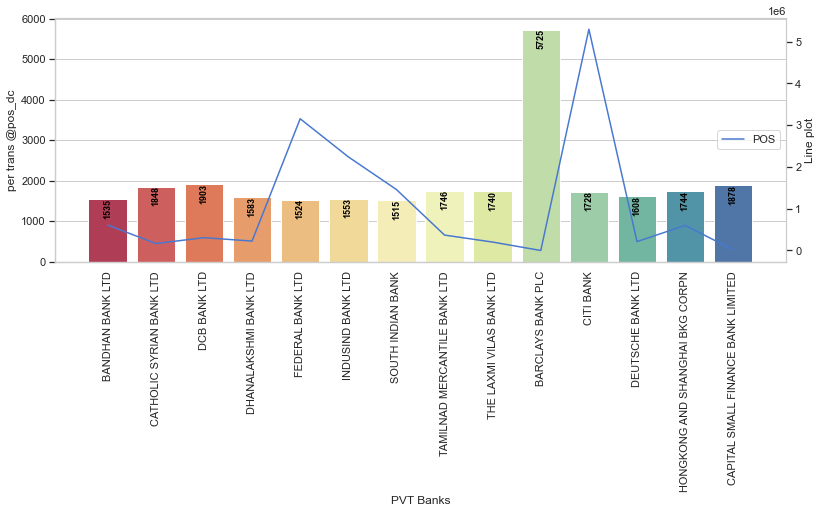

In [226]:
plot=sns.catplot(x="Bank Name",y="DC_POS_PTransac_2018",data=high_pvt_2018_dcpos,kind='bar',height=4,aspect=3,palette='Spectral')#uepalette='cubehelix'
plt.xticks(rotation=90)
plt.xlabel("PVT Banks")
plt.ylabel("per trans @pos_dc")

for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i, # bar index (x coordinate of text)
        h+10, # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center', 
        va='top', 
        color='black',
        fontweight='bold',
        rotation=90,
        size=9)

x = high_pvt_2018_dcpos["Bank Name"]
y = high_pvt_2018_dcpos["DC_POS_Transaction"]
axes2 = plt.twinx()
axes2.plot(x, y, color='b',label='POS')
axes2.set_ylabel('Line plot')
plt.grid(False)
plt.legend(loc='right')
